# Install packages 

In [16]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [1]:
# basics liberaries 
import matplotlib as mat
import seaborn as sb
import numpy as np
import math as m
import statistics as st
import pandas as pd
from pandas.plotting import scatter_matrix

# data processsing liberaries
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import KBinsDiscretizer
from sklearn import model_selection
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV,cross_val_score, KFold
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

# feature selection 
from sklearn.feature_selection import  chi2, mutual_info_classif
from sklearn.feature_selection import SelectKBest, f_classif, RFE


#resampling Method liberaries
from imblearn import *
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SVMSMOTE
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek

# classifer liberaries
from sklearn import *
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import StackingClassifier 


#Evaluation Libreraries
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, classification_report,auc
from sklearn.metrics import accuracy_score


import matplotlib.pyplot as plt
from time import time

# First dataset

# 1) Import data, Explotary data analysis, and data processing

## 1.1 Import Data

In [97]:
df_1 = pd.read_csv('The first datsset fraud_data.csv', delimiter=";")

df_1

PolicyNumber Month  WeekOfMonth  DayOfWeek The vehicle Brand  \
0                 1   Dec            5  Wednesday             Honda   
1                 2   Jan            3  Wednesday             Honda   
2                 3   Oct            5     Friday             Honda   
3                 4   Jun            2   Saturday            Toyota   
4                 5   Jan            5     Monday             Honda   
...             ...   ...          ...        ...               ...   
15414         15415   Nov            4     Friday            Toyota   
15415         15416   Nov            5   Thursday           Pontiac   
15416         15417   Nov            5   Thursday            Toyota   
15417         15418   Dec            1     Monday            Toyota   
15418         15419   Dec            2  Wednesday            Toyota   

      AccidentArea DayOfWeekClaimed MonthClaimed  WeekOfMonthClaimed     Sex  \
0            Urban          Tuesday          Jan                   1  Female   
1            Urban           Monday          Jan                   4    Male   
2            Urban         Thursday          Nov                   2    Male   
3            Rural           Friday          Jul                   1    Male   
4            Urban          Tuesday          Feb                   2  Female   
...            ...              ...          ...                 ...     ...   
15414        Urban          Tuesday          Nov                   5    Male   
15415        Urban           Friday          Dec                   1    Male   
15416        Rural           Friday          Dec                   1    Male   
15417        Urban         Thursday          Dec                   2  Female   
15418        Urban         Thursday          Dec                   3    Male   

       ... AgeOfPolicyHolder PoliceReportFiled WitnessPresent AgentType  \
0      ...          26 to 30                No             No  External   
1      ...          31 to 35               Yes             No  External   
2      ...          41 to 50                No             No  External   
3      ...          51 to 65               Yes             No  External   
4      ...          31 to 35                No             No  External   
...    ...               ...               ...            ...       ...   
15414  ...          31 to 35                No             No  External   
15415  ...          31 to 35                No             No  External   
15416  ...          26 to 30                No             No  External   
15417  ...          31 to 35                No             No  External   
15418  ...          26 to 30                No             No  External   

      NumberOfSuppliments AddressChange_Claim  NumberOfCars  Year  BasePolicy  \
0                    none              1 year        3 to 4  1994   Liability   
1                    none           no change     1 vehicle  1994   Collision   
2                    none           no change     1 vehicle  1994   Collision   
3             more than 5           no change     1 vehicle  1994   Liability   
4                    none           no change     1 vehicle  1994   Collision   
...                   ...                 ...           ...   ...         ...   
15414                none           no change     1 vehicle  1996   Collision   
15415         more than 5           no change        3 to 4  1996   Liability   
15416              1 to 2           no change     1 vehicle  1996   Collision   
15417         more than 5           no change     1 vehicle  1996  All Perils   
15418              1 to 2           no change     1 vehicle  1996   Collision   

      FraudFound_P  
0                0  
1                0  
2                0  
3                0  
4                0  
...            ...  
15414            1  
15415            0  
15416            1  
15417            0  
15418            1  

[15419 rows x 32 columns]

In [98]:
df_1.shape

(15419, 32)

## 1.2 The descriptive analysis

In [99]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15419 entries, 0 to 15418
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   PolicyNumber          15419 non-null  int64 
 1   Month                 15419 non-null  object
 2   WeekOfMonth           15419 non-null  int64 
 3   DayOfWeek             15419 non-null  object
 4   The vehicle Brand     15419 non-null  object
 5   AccidentArea          15419 non-null  object
 6   DayOfWeekClaimed      15419 non-null  object
 7   MonthClaimed          15419 non-null  object
 8   WeekOfMonthClaimed    15419 non-null  int64 
 9   Sex                   15419 non-null  object
 10  MaritalStatus         15419 non-null  object
 11  Age                   15419 non-null  object
 12  Fault                 15419 non-null  object
 13  PolicyType            15419 non-null  object
 14  VehicleCategory       15419 non-null  object
 15  VehiclePrice          15419 non-null

In [101]:
# printing unique values of each column
for col in df_1.columns:
    print(f"{col}: \n{df_1[col].unique()}\n")

PolicyNumber: 
[    1     2     3 ... 15417 15418 15419]

Month: 
['Dec' 'Jan' 'Oct' 'Jun' 'Feb' 'Nov' 'Apr' 'Mar' 'Aug' 'Jul' 'May' 'Sep']

WeekOfMonth: 
[5 3 2 4 1]

DayOfWeek: 
['Wednesday' 'Friday' 'Saturday' 'Monday' 'Tuesday' 'Sunday' 'Thursday']

The vehicle Brand: 
['Honda' 'Toyota' 'Ford' 'Mazda' 'Chevrolet' 'Pontiac' 'Accura' 'Dodge'
 'Mercury' 'Jaguar' 'Nisson' 'VW' 'Saab' 'Saturn' 'Porche' 'BMW' 'Mecedes'
 'Ferrari' 'Lexus']

AccidentArea: 
['Urban' 'Rural']

DayOfWeekClaimed: 
['Tuesday' 'Monday' 'Thursday' 'Friday' 'Wednesday' 'Saturday' 'Sunday']

MonthClaimed: 
['Jan' 'Nov' 'Jul' 'Feb' 'Mar' 'Dec' 'Apr' 'Aug' 'May' 'Jun' 'Sep' 'Oct']

WeekOfMonthClaimed: 
[1 4 2 3 5]

Sex: 
['Female' 'Male']

MaritalStatus: 
['Single' 'Married' 'Widow' 'Divorced']

Age: 
['21' '34' '47' '65' '27' '20' '36' 'none' '30' '42' '71' '52' '28' '61'
 '38' '41' '32' '40' '63' '31' '45' '60' '39' '55' '35' '44' '72' '29'
 '37' '59' '49' '50' '26' '48' '64' '33' '74' '23' '25' '56' '16' '68'
 '18

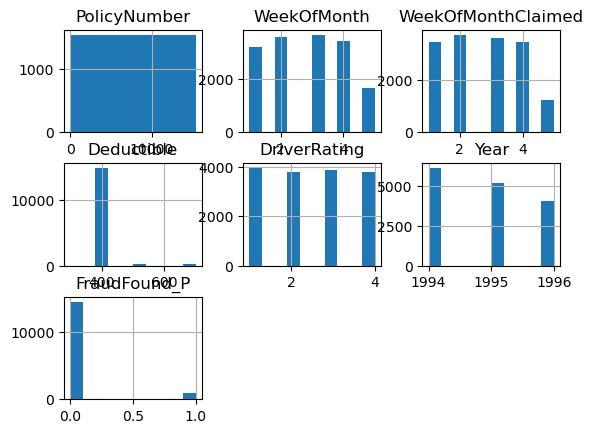

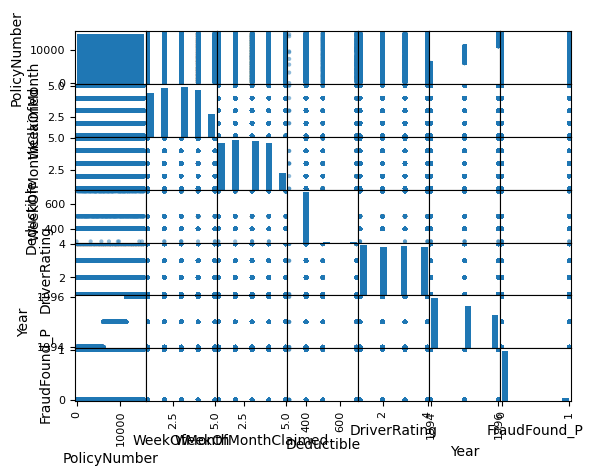

In [102]:
df_1.hist()
scatter_matrix(df_1)
plt.show()

## 1.3 Check missing data and handeling, Check the duplicate in the dataset

In [103]:
# removing columns which not important and repeated ("PolicyNumber" , "Age")
df_1 = df_1.drop(columns =["PolicyNumber"])
df_1

Month  WeekOfMonth  DayOfWeek The vehicle Brand AccidentArea  \
0       Dec            5  Wednesday             Honda        Urban   
1       Jan            3  Wednesday             Honda        Urban   
2       Oct            5     Friday             Honda        Urban   
3       Jun            2   Saturday            Toyota        Rural   
4       Jan            5     Monday             Honda        Urban   
...     ...          ...        ...               ...          ...   
15414   Nov            4     Friday            Toyota        Urban   
15415   Nov            5   Thursday           Pontiac        Urban   
15416   Nov            5   Thursday            Toyota        Rural   
15417   Dec            1     Monday            Toyota        Urban   
15418   Dec            2  Wednesday            Toyota        Urban   

      DayOfWeekClaimed MonthClaimed  WeekOfMonthClaimed     Sex MaritalStatus  \
0              Tuesday          Jan                   1  Female        Single   
1               Monday          Jan                   4    Male        Single   
2             Thursday          Nov                   2    Male       Married   
3               Friday          Jul                   1    Male       Married   
4              Tuesday          Feb                   2  Female        Single   
...                ...          ...                 ...     ...           ...   
15414          Tuesday          Nov                   5    Male       Married   
15415           Friday          Dec                   1    Male       Married   
15416           Friday          Dec                   1    Male        Single   
15417         Thursday          Dec                   2  Female       Married   
15418         Thursday          Dec                   3    Male        Single   

       ... AgeOfPolicyHolder PoliceReportFiled WitnessPresent AgentType  \
0      ...          26 to 30                No             No  External   
1      ...          31 to 35               Yes             No  External   
2      ...          41 to 50                No             No  External   
3      ...          51 to 65               Yes             No  External   
4      ...          31 to 35                No             No  External   
...    ...               ...               ...            ...       ...   
15414  ...          31 to 35                No             No  External   
15415  ...          31 to 35                No             No  External   
15416  ...          26 to 30                No             No  External   
15417  ...          31 to 35                No             No  External   
15418  ...          26 to 30                No             No  External   

      NumberOfSuppliments  AddressChange_Claim  NumberOfCars  Year  \
0                    none               1 year        3 to 4  1994   
1                    none            no change     1 vehicle  1994   
2                    none            no change     1 vehicle  1994   
3             more than 5            no change     1 vehicle  1994   
4                    none            no change     1 vehicle  1994   
...                   ...                  ...           ...   ...   
15414                none            no change     1 vehicle  1996   
15415         more than 5            no change        3 to 4  1996   
15416              1 to 2            no change     1 vehicle  1996   
15417         more than 5            no change     1 vehicle  1996   
15418              1 to 2            no change     1 vehicle  1996   

       BasePolicy FraudFound_P  
0       Liability            0  
1       Collision            0  
2       Collision            0  
3       Liability            0  
4       Collision            0  
...           ...          ...  
15414   Collision            1  
15415   Liability            0  
15416   Collision            1  
15417  All Perils            0  
15418   Collision            1  

[15419 rows x 31 columns]

In [104]:
# Percentage of missing data for each feature # we can see some missing values denoted by '?' so lets replace missing values with np.nan

df_1.replace('none', np.nan, inplace = True)
print(df_1.isna().sum().sort_values(ascending=False) / len(df_1) * 100)

NumberOfSuppliments     45.696868
PastNumberOfClaims      28.218432
Age                      2.068876
Days_Policy_Accident     0.356703
Month                    0.000000
DriverRating             0.000000
BasePolicy               0.000000
Year                     0.000000
NumberOfCars             0.000000
AddressChange_Claim      0.000000
AgentType                0.000000
WitnessPresent           0.000000
PoliceReportFiled        0.000000
AgeOfPolicyHolder        0.000000
AgeOfVehicle             0.000000
Days_Policy_Claim        0.000000
Deductible               0.000000
WeekOfMonth              0.000000
VehiclePrice             0.000000
VehicleCategory          0.000000
PolicyType               0.000000
Fault                    0.000000
MaritalStatus            0.000000
Sex                      0.000000
WeekOfMonthClaimed       0.000000
MonthClaimed             0.000000
DayOfWeekClaimed         0.000000
AccidentArea             0.000000
The vehicle Brand        0.000000
DayOfWeek     

In [105]:
# another way for checking columns with NAN values

for i,(j,k) in  enumerate(df_1.isnull().sum().iteritems()):
    if k:
        print(i,j,k)

10 Age 319
17 Days_Policy_Accident 55
19 PastNumberOfClaims 4351
25 NumberOfSuppliments 7046


In [107]:
# removing columns with high percenage of missing values ("PastNumberOfClaims" , "NumberOfSuppliments")
df_1 = df_1.drop(columns =["PastNumberOfClaims" , "NumberOfSuppliments"])

In [108]:
df_1

Month  WeekOfMonth  DayOfWeek The vehicle Brand AccidentArea  \
0       Dec            5  Wednesday             Honda        Urban   
1       Jan            3  Wednesday             Honda        Urban   
2       Oct            5     Friday             Honda        Urban   
3       Jun            2   Saturday            Toyota        Rural   
4       Jan            5     Monday             Honda        Urban   
...     ...          ...        ...               ...          ...   
15414   Nov            4     Friday            Toyota        Urban   
15415   Nov            5   Thursday           Pontiac        Urban   
15416   Nov            5   Thursday            Toyota        Rural   
15417   Dec            1     Monday            Toyota        Urban   
15418   Dec            2  Wednesday            Toyota        Urban   

      DayOfWeekClaimed MonthClaimed  WeekOfMonthClaimed     Sex MaritalStatus  \
0              Tuesday          Jan                   1  Female        Single   
1               Monday          Jan                   4    Male        Single   
2             Thursday          Nov                   2    Male       Married   
3               Friday          Jul                   1    Male       Married   
4              Tuesday          Feb                   2  Female        Single   
...                ...          ...                 ...     ...           ...   
15414          Tuesday          Nov                   5    Male       Married   
15415           Friday          Dec                   1    Male       Married   
15416           Friday          Dec                   1    Male        Single   
15417         Thursday          Dec                   2  Female       Married   
15418         Thursday          Dec                   3    Male        Single   

       ... AgeOfVehicle AgeOfPolicyHolder PoliceReportFiled WitnessPresent  \
0      ...      3 years          26 to 30                No             No   
1      ...      6 years          31 to 35               Yes             No   
2      ...      7 years          41 to 50                No             No   
3      ...  more than 7          51 to 65               Yes             No   
4      ...      5 years          31 to 35                No             No   
...    ...          ...               ...               ...            ...   
15414  ...      6 years          31 to 35                No             No   
15415  ...      6 years          31 to 35                No             No   
15416  ...      5 years          26 to 30                No             No   
15417  ...      2 years          31 to 35                No             No   
15418  ...      5 years          26 to 30                No             No   

      AgentType  AddressChange_Claim  NumberOfCars  Year  BasePolicy  \
0      External               1 year        3 to 4  1994   Liability   
1      External            no change     1 vehicle  1994   Collision   
2      External            no change     1 vehicle  1994   Collision   
3      External            no change     1 vehicle  1994   Liability   
4      External            no change     1 vehicle  1994   Collision   
...         ...                  ...           ...   ...         ...   
15414  External            no change     1 vehicle  1996   Collision   
15415  External            no change        3 to 4  1996   Liability   
15416  External            no change     1 vehicle  1996   Collision   
15417  External            no change     1 vehicle  1996  All Perils   
15418  External            no change     1 vehicle  1996   Collision   

      FraudFound_P  
0                0  
1                0  
2                0  
3                0  
4                0  
...            ...  
15414            1  
15415            0  
15416            1  
15417            0  
15418            1  

[15419 rows x 29 columns]

In [109]:
#handeling the missing values in other columns by fill in with the mode

df_1['Age'] = df_1['Age'].fillna(df_1['Age'].mode()[0])
df_1['Days_Policy_Accident'] = df_1['Days_Policy_Accident'].fillna(df_1['Days_Policy_Accident'].mode()[0])

In [110]:
# Check the missing values in the dataset after handling

print(df_1.isna().sum().sort_values(ascending=False) / len(df_1) * 100)

Month                   0.0
Deductible              0.0
BasePolicy              0.0
Year                    0.0
NumberOfCars            0.0
AddressChange_Claim     0.0
AgentType               0.0
WitnessPresent          0.0
PoliceReportFiled       0.0
AgeOfPolicyHolder       0.0
AgeOfVehicle            0.0
Days_Policy_Claim       0.0
Days_Policy_Accident    0.0
DriverRating            0.0
VehiclePrice            0.0
WeekOfMonth             0.0
VehicleCategory         0.0
PolicyType              0.0
Fault                   0.0
Age                     0.0
MaritalStatus           0.0
Sex                     0.0
WeekOfMonthClaimed      0.0
MonthClaimed            0.0
DayOfWeekClaimed        0.0
AccidentArea            0.0
The vehicle Brand       0.0
DayOfWeek               0.0
FraudFound_P            0.0
dtype: float64


In [111]:
#check the duplicate in the dataset
duplicate = df_1[df.duplicated()]
print("Duplicate Rows :")
print(duplicate)

Duplicate Rows :
Empty DataFrame
Columns: [Month, WeekOfMonth, DayOfWeek, The vehicle Brand, AccidentArea, DayOfWeekClaimed, MonthClaimed, WeekOfMonthClaimed, Sex, MaritalStatus, Age, Fault, PolicyType, VehicleCategory, VehiclePrice, Deductible, DriverRating, Days_Policy_Accident, Days_Policy_Claim, AgeOfVehicle, AgeOfPolicyHolder, PoliceReportFiled, WitnessPresent, AgentType, AddressChange_Claim, NumberOfCars, Year, BasePolicy, FraudFound_P]
Index: []

[0 rows x 29 columns]


In [112]:
#Check if there are any duplicate in the dataset #there are no duplicate rows
print(len(df_1.drop_duplicates())==len(df_1))

True


## 1.4 Scaling the numerical features and Encoding the categorical feature

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15419 entries, 0 to 15418
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Month                 15419 non-null  int64
 1   WeekOfMonth           15419 non-null  int64
 2   DayOfWeek             15419 non-null  int64
 3   The vehicle Brand     15419 non-null  int64
 4   AccidentArea          15419 non-null  int64
 5   DayOfWeekClaimed      15419 non-null  int64
 6   MonthClaimed          15419 non-null  int64
 7   WeekOfMonthClaimed    15419 non-null  int64
 8   Sex                   15419 non-null  int64
 9   MaritalStatus         15419 non-null  int64
 10  Age                   15419 non-null  int64
 11  Fault                 15419 non-null  int64
 12  PolicyType            15419 non-null  int64
 13  VehicleCategory       15419 non-null  int64
 14  VehiclePrice          15419 non-null  int64
 15  Deductible            15419 non-null  int64
 16  Driv

array([[<AxesSubplot:title={'center':'Month'}>,
        <AxesSubplot:title={'center':'WeekOfMonth'}>,
        <AxesSubplot:title={'center':'DayOfWeek'}>,
        <AxesSubplot:title={'center':'The vehicle Brand'}>,
        <AxesSubplot:title={'center':'AccidentArea'}>],
       [<AxesSubplot:title={'center':'DayOfWeekClaimed'}>,
        <AxesSubplot:title={'center':'MonthClaimed'}>,
        <AxesSubplot:title={'center':'WeekOfMonthClaimed'}>,
        <AxesSubplot:title={'center':'Sex'}>,
        <AxesSubplot:title={'center':'MaritalStatus'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Fault'}>,
        <AxesSubplot:title={'center':'PolicyType'}>,
        <AxesSubplot:title={'center':'VehicleCategory'}>,
        <AxesSubplot:title={'center':'VehiclePrice'}>],
       [<AxesSubplot:title={'center':'Deductible'}>,
        <AxesSubplot:title={'center':'DriverRating'}>,
        <AxesSubplot:title={'center':'Days_Policy_Accident'}>,
        <AxesSubplot

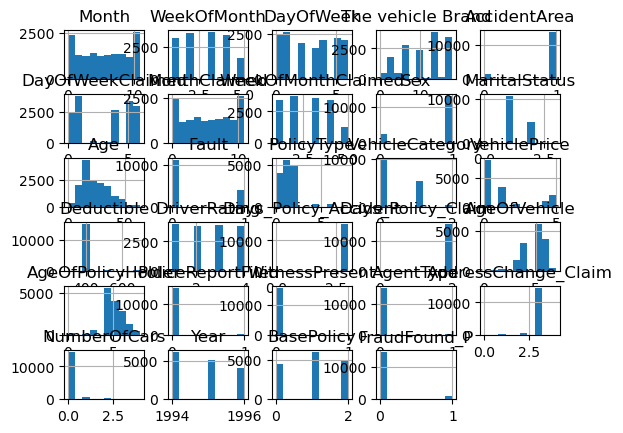

In [113]:
#Encoding the categorical features
encoder = LabelEncoder()

categorical_features = df_1.select_dtypes(include=['object']).columns

for col in categorical_features:
    df_1[col] = encoder.fit_transform(df_1[col])
    
df_1[categorical_features] = df_1[categorical_features].astype('int64')

df_1.info()
df_1.hist()

In [82]:
# Scaling the numerical features
scaler = StandardScaler()

numeric_features = []

for col in df.columns:
    if(df_1[col].dtype == "float" or df_1[col].dtype == "int64"):
        numeric_features.append(col)

df_1[numeric_features] = scaler.fit_transform(df_1[numeric_features])

## 1.4 Investigate the Correlation and multicollinearity between the features in the dataset 


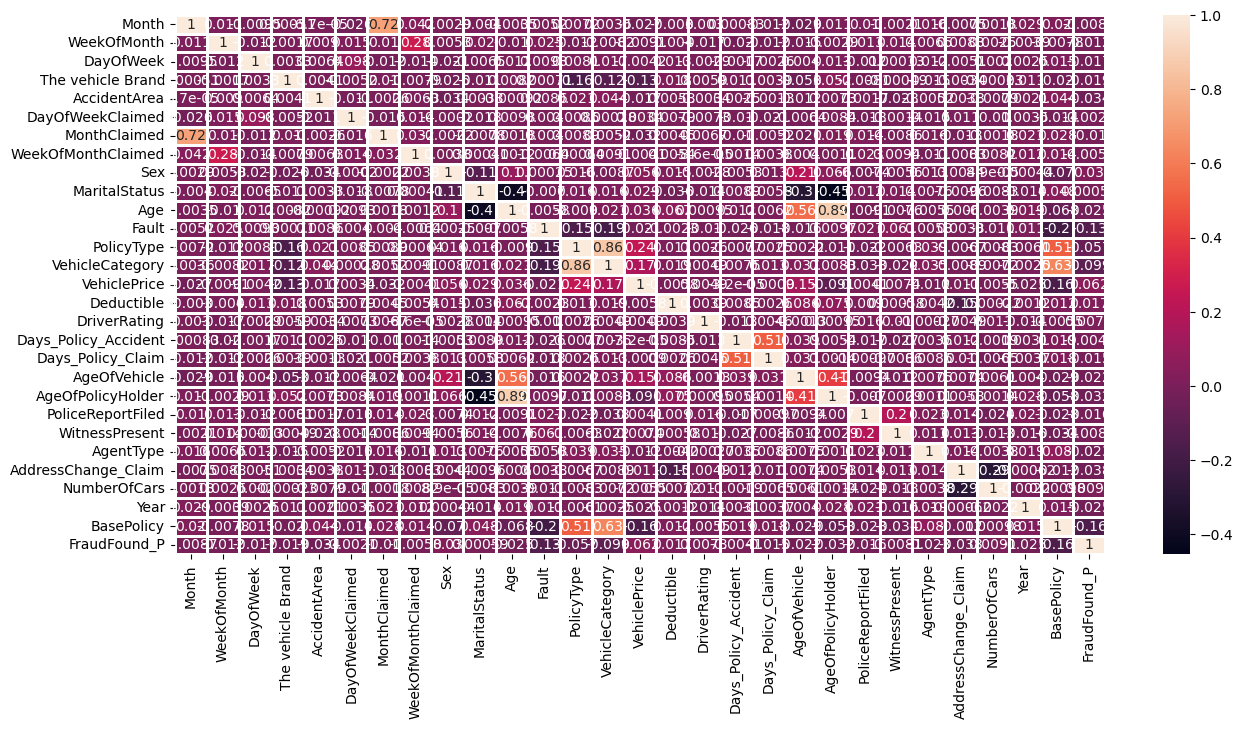

In [114]:
# heatmap

plt.figure(figsize = (15, 7))

corr = df_1.corr()

sb.heatmap(data = corr, annot = True, fmt = '.2g', linewidth = 1)
plt.show()

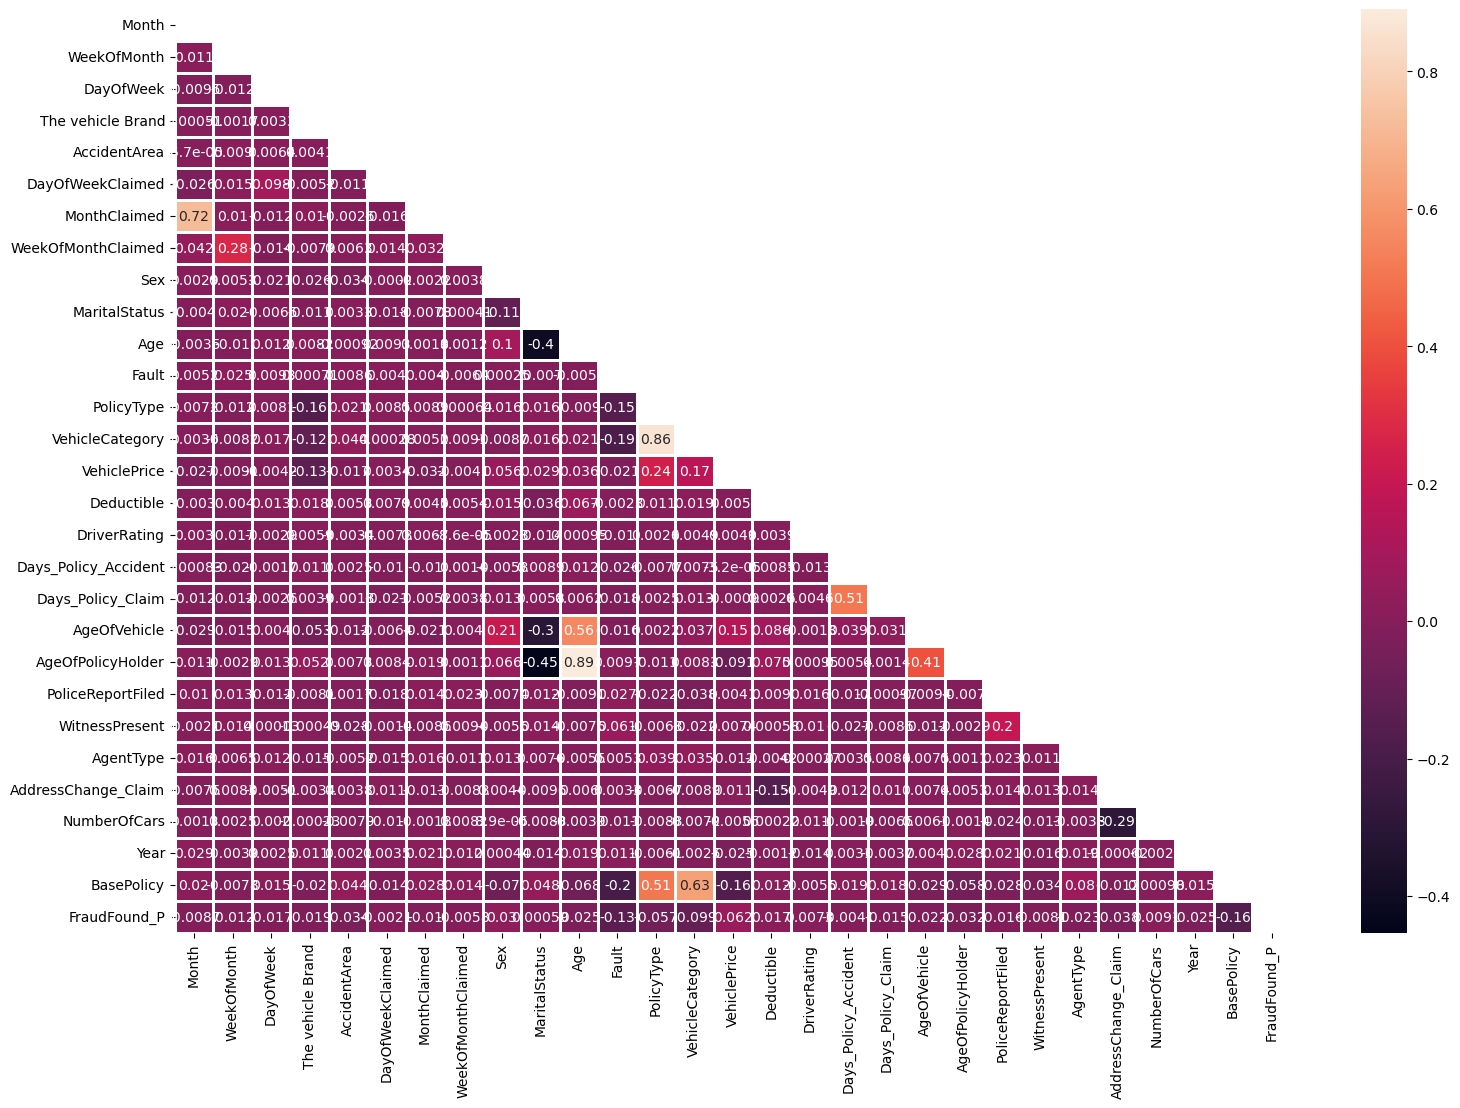

In [115]:
# checking for multicollinearity

plt.figure(figsize = (18, 12))

corr = df_1.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sb.heatmap(data = corr, mask = mask, annot = True, fmt = '.2g', linewidth = 1)
plt.show()

## 1.5 visualise the traget variable

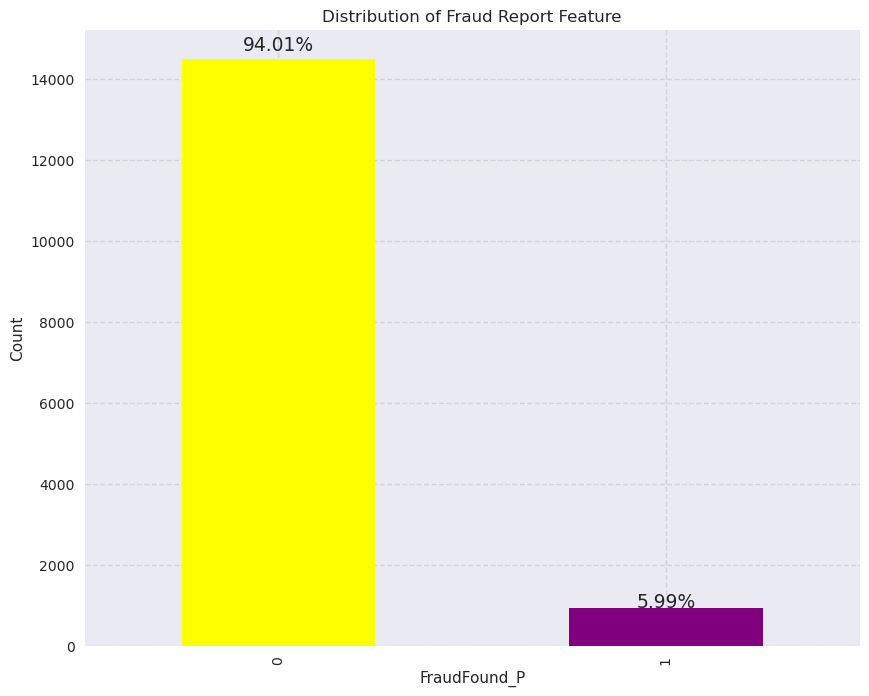

In [116]:
# visualise the traget variable

with plt.style.context('seaborn'):
  plt.figure(figsize=(10,8))
  fig = df_1['FraudFound_P'].value_counts().plot(kind='bar', color=['yellow','purple'])
  # Using the "patches" function we will get the location of the rectangle bars from the graph.
  ## Then by using those location(width & height) values we will add the annotations
  for p in fig.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    fig.annotate(f'{str(round((height*100)/df.shape[0],2))+"%"}', (x + width/2, y + height*1.015), ha='center', fontsize=13.5)
  # Providing the labels and title to the graph
  plt.xlabel("FraudFound_P")
  plt.ylabel("Count")
  plt.grid(which='major', linestyle="--", color='lightgrey')
  plt.minorticks_on()
  plt.title("Distribution of Fraud Report Feature")

In [117]:
df_1["FraudFound_P"].value_counts()
print(df_1["FraudFound_P"].value_counts(), df_1["FraudFound_P"].value_counts() / len(df_1) * 100)

0    14496
1      923
Name: FraudFound_P, dtype: int64 0    94.013879
1     5.986121
Name: FraudFound_P, dtype: float64


In [23]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15419 entries, 0 to 15418
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Month                 15419 non-null  int64
 1   WeekOfMonth           15419 non-null  int64
 2   DayOfWeek             15419 non-null  int64
 3   The vehicle Brand     15419 non-null  int64
 4   AccidentArea          15419 non-null  int64
 5   DayOfWeekClaimed      15419 non-null  int64
 6   MonthClaimed          15419 non-null  int64
 7   WeekOfMonthClaimed    15419 non-null  int64
 8   Sex                   15419 non-null  int64
 9   MaritalStatus         15419 non-null  int64
 10  Age                   15419 non-null  int64
 11  Fault                 15419 non-null  int64
 12  PolicyType            15419 non-null  int64
 13  VehicleCategory       15419 non-null  int64
 14  VehiclePrice          15419 non-null  int64
 15  Deductible            15419 non-null  int64
 16  Driv

In [120]:
# visualise the other categorical features according to Target variable

#colz = ['EDUCATION', 'OCCUPATION', 'CAR_TYPE', 'URBANICITY']

#for col in colz:
    #ax = sns.countplot(x=df[col], hue=df['CLAIM_FLAG'], data=df)
    #ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
    #plt.show()

X1       Int32
X2       Int32
X6       Int32
X8       Int32
X11    float64
X13      Int32
X15      Int32
X16      Int32
X18      Int32
X19      Int32
X20      Int32
X3       int32
X4       int32
X5       int32
X7       int32
X9       int32
X10      int32
X12      int32
X14      int32
X17      int32
X21      int32
dtype: object

## 1.6 Splitting Data step

# Split data into train and test data

In [119]:
#split the data in X and Y
X_1 = df_1.drop(columns=['FraudFound_P'])
Y_1 = df_1['FraudFound_P']

print(X_1.shape)
print(Y_1.shape)
X_1.info()

(15419, 28)
(15419,)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15419 entries, 0 to 15418
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Month                 15419 non-null  int64
 1   WeekOfMonth           15419 non-null  int64
 2   DayOfWeek             15419 non-null  int64
 3   The vehicle Brand     15419 non-null  int64
 4   AccidentArea          15419 non-null  int64
 5   DayOfWeekClaimed      15419 non-null  int64
 6   MonthClaimed          15419 non-null  int64
 7   WeekOfMonthClaimed    15419 non-null  int64
 8   Sex                   15419 non-null  int64
 9   MaritalStatus         15419 non-null  int64
 10  Age                   15419 non-null  int64
 11  Fault                 15419 non-null  int64
 12  PolicyType            15419 non-null  int64
 13  VehicleCategory       15419 non-null  int64
 14  VehiclePrice          15419 non-null  int64
 15  Deductible            15419 non-

       Month  WeekOfMonth  DayOfWeek  The vehicle Brand  AccidentArea  \
0        0.0          4.0        4.0                1.0           4.0   
1        1.0          2.0        4.0                1.0           4.0   
2        4.0          4.0        0.0                1.0           4.0   
3        2.0          1.0        1.0                4.0           0.0   
4        1.0          4.0        0.0                1.0           4.0   
...      ...          ...        ...                ...           ...   
15414    4.0          3.0        0.0                4.0           4.0   
15415    4.0          4.0        3.0                3.0           4.0   
15416    4.0          4.0        3.0                4.0           0.0   
15417    0.0          0.0        0.0                4.0           4.0   
15418    0.0          1.0        4.0                4.0           4.0   

       DayOfWeekClaimed  MonthClaimed  WeekOfMonthClaimed  Sex  MaritalStatus  \
0                   4.0           1.0     

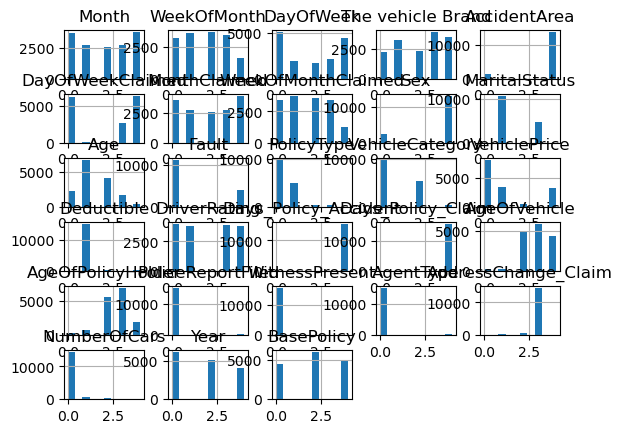

In [84]:
#Discretization The data using  KBinsDiscretizer 
X_1 = X_1.astype('float32')

KBins = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')

numeric_features = []

for col in X_1.columns:
    if(X_1[col].dtype == "float32" or X_1[col].dtype == "int64"):
        numeric_features.append(col)

X_1[numeric_features] = KBins.fit_transform(X_1[numeric_features])
    
print (X_1[numeric_features])
X_1.hist()
X_1.info()

# Feature selection method

## 1. Univariate Feature Selection (SelectKBest with ANOVA F-value)

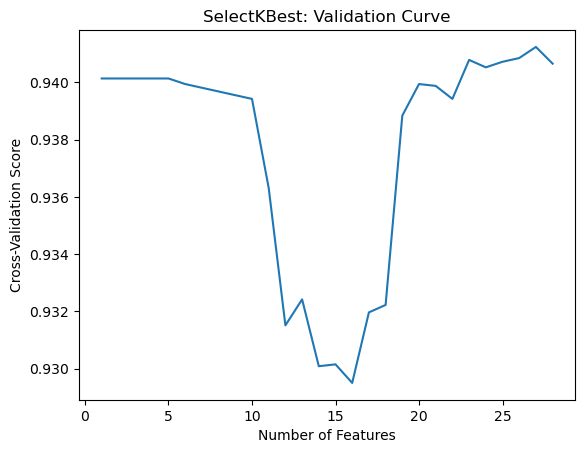

In [178]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation with different number of features
num_features_range = range(1, X_1.shape[1] + 1)
cv_scores = []
for k in num_features_range:
    k_best_selector = SelectKBest(score_func=f_classif, k=k)
    X_1_kbest = k_best_selector.fit_transform(X_1, Y_1)
    scores = cross_val_score(RandomForestClassifier(), X_1_kbest, Y_1, cv=5)
    cv_scores.append(scores.mean())

# Plot validation curve
plt.plot(num_features_range, cv_scores)
plt.xlabel('Number of Features')
plt.ylabel('Cross-Validation Score')
plt.title('SelectKBest: Validation Curve')
plt.show()

Selected features using SelectKBest:  [ 4  8 10 11 12 13 14 20 24 27]


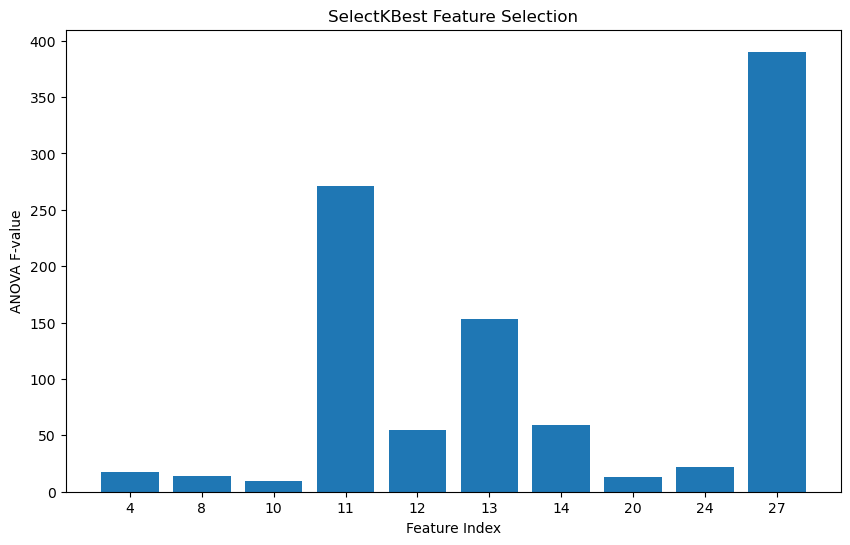

In [196]:
k_best_selector = SelectKBest(score_func=f_classif, k=10)
X__1_kbest = k_best_selector.fit_transform(X_1, Y_1)
selected_features_kbest = np.where(k_best_selector.get_support())[0]

print("Selected features using SelectKBest: ", selected_features_kbest)

# Plotting SelectKBest results
plt.figure(figsize=(10, 6))
plt.bar(range(len(selected_features_kbest)), k_best_selector.scores_[k_best_selector.get_support()])
plt.xticks(range(len(selected_features_kbest)), selected_features_kbest)
plt.xlabel('Feature Index')
plt.ylabel('ANOVA F-value')
plt.title('SelectKBest Feature Selection')
plt.show()

## 2 Recursive Feature Elimination (RFE) 

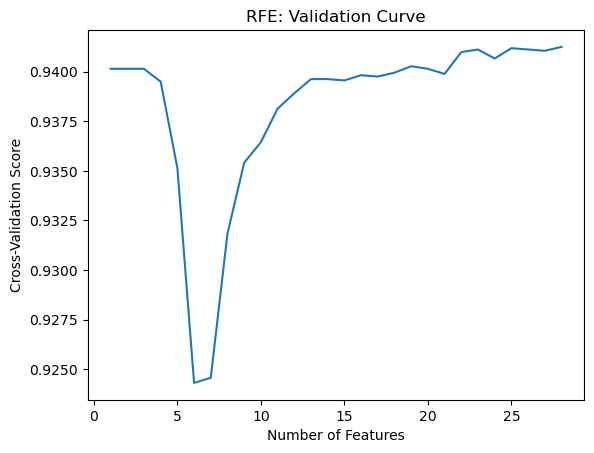

In [215]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation with different number of features
num_features_range = range(1, X_1.shape[1] + 1)
cv_scores = []
for k in num_features_range:
    rf_classifier = RandomForestClassifier()
    rfe_selector = RFE(estimator=rf_classifier, n_features_to_select=k, step=1)
    X_1_rfe = rfe_selector.fit_transform(X_1, Y_1)
    scores = cross_val_score(rf_classifier, X_1_rfe, Y_1, cv=5)
    cv_scores.append(scores.mean())

# Plot validation curve
plt.plot(num_features_range, cv_scores)
plt.xlabel('Number of Features')
plt.ylabel('Cross-Validation Score')
plt.title('RFE: Validation Curve')
plt.show()

In [216]:
rf_classifier = RandomForestClassifier()
rfe_selector = RFE(estimator=rf_classifier, n_features_to_select=16, step=1)
X_1_RFE = rfe_selector.fit_transform(X_1, Y_1)
selected_features_rfe = np.where(rfe_selector.support_)[0]

# Print selected features
print("Selected features using RFE: ", selected_features_rfe)


# Plotting RFE results
plt.figure(figsize=(10, 6))
selected_feature_importances = rfe_selector.estimator_.feature_importances_[rfe_selector.support_]
plt.bar(range(len(selected_feature_importances)), selected_feature_importances)
plt.xticks(range(len(selected_features_rfe)), selected_features_rfe)
plt.xlabel('Feature Index')
plt.ylabel('Feature Importance')
plt.title('RFE Feature Selection')
plt.show()

Selected features using RFE:  [ 0  1  2  3  5  6  7 10 11 14 16 19 20 24 26 27]


IndexError: boolean index did not match indexed array along dimension 0; dimension is 16 but corresponding boolean dimension is 28

<Figure size 1000x600 with 0 Axes>

In [249]:
smotesample = SMOTE(random_state=42)

# Smotesampling
X_b, Y_b= smotesample.fit_resample(X_1_RFE, Y_1)

X_new = pd.DataFrame(X_b)
Y_new = pd.DataFrame(Y_b)

New_data = pd.concat([X_new, Y_new], axis=0)

In [85]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split (X_1, Y_1, test_size=0.20, random_state=42)

print (X1_train.shape)
print (Y1_train.shape)
print (X1_test.shape)
print (Y1_test.shape)

X1_train.count()
Y1_train.count()
X1_test.count()
Y1_test.count()

(12335, 28)
(12335,)
(3084, 28)
(3084,)


3084

# Resampling Methods

## 1. Undersampler

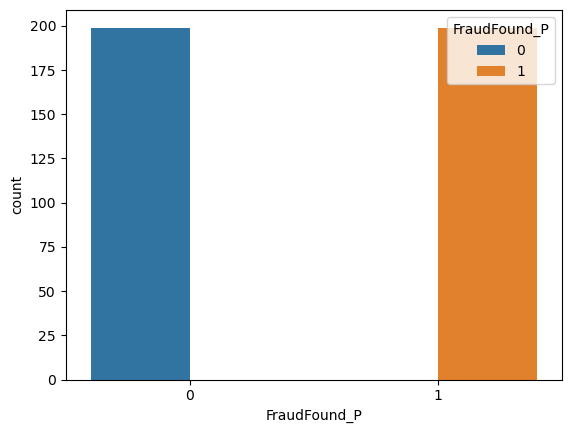

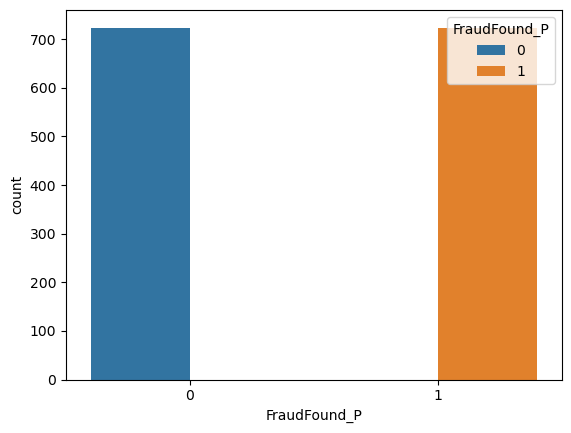

0    11611
1      724
Name: FraudFound_P, dtype: int64
0    2885
1     199
Name: FraudFound_P, dtype: int64


In [44]:
undersample = RandomUnderSampler(sampling_strategy='majority', random_state=42)

# undersampling
X_b, Y_b = undersample.fit_resample(X_1, Y_1)

X_new = pd.DataFrame(X_b)
Y_new = pd.DataFrame(Y_b)

New_data = pd.concat([X_new, Y_new], axis=0)

## 2. Oversampler

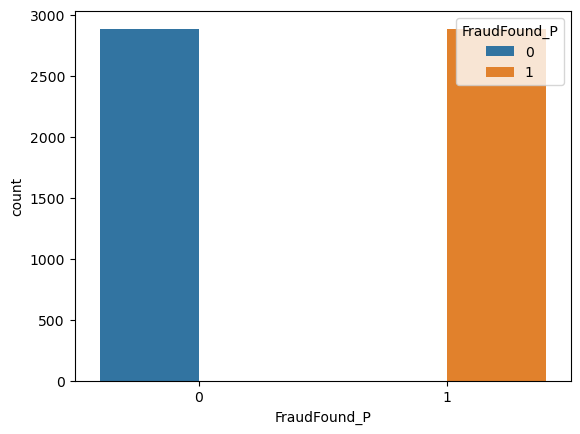

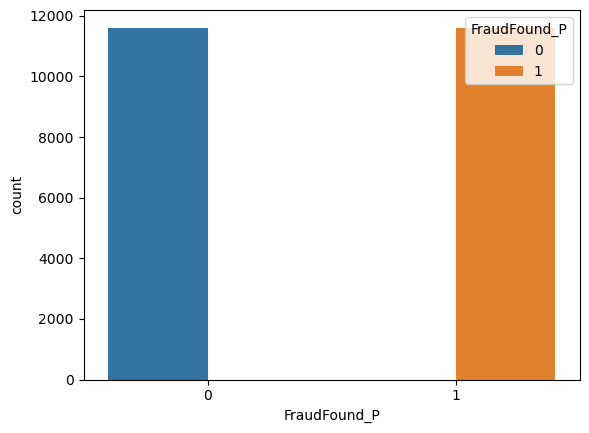

0    11611
1      724
Name: FraudFound_P, dtype: int64
0    2885
1     199
Name: FraudFound_P, dtype: int64


In [48]:
Oversample = RandomOverSampler(random_state=42)

# oversampling
X_b, Y_b = Oversample.fit_resample(X_1, Y_1)

X_new = pd.DataFrame(X_b)
Y_new = pd.DataFrame(Y_b)

New_data = pd.concat([X_new, Y_new], axis=0)

## 3. SMOTE sampler

In [117]:
smotesample = SMOTE(random_state=42)

# Smotesampling
X_b, Y_b= smotesample.fit_resample(X_1, Y_1)

X_new = pd.DataFrame(X_b)
Y_new = pd.DataFrame(Y_b)

New_data = pd.concat([X_new, Y_new], axis=0)

Month  WeekOfMonth  DayOfWeek  The vehicle Brand  AccidentArea  \
0        2.0          5.0        6.0                6.0           1.0   
1        4.0          3.0        6.0                6.0           1.0   
2       10.0          5.0        0.0                6.0           1.0   
3        6.0          2.0        2.0               17.0           0.0   
4        4.0          5.0        1.0                6.0           1.0   
...      ...          ...        ...                ...           ...   
28987    NaN          NaN        NaN                NaN           NaN   
28988    NaN          NaN        NaN                NaN           NaN   
28989    NaN          NaN        NaN                NaN           NaN   
28990    NaN          NaN        NaN                NaN           NaN   
28991    NaN          NaN        NaN                NaN           NaN   

       DayOfWeekClaimed  MonthClaimed  WeekOfMonthClaimed  Sex  MaritalStatus  \
0                   5.0           4.0                 1.0  0.0            2.0   
1                   1.0           4.0                 4.0  1.0            2.0   
2                   4.0           9.0                 2.0  1.0            1.0   
3                   0.0           5.0                 1.0  1.0            1.0   
4                   5.0           3.0                 2.0  0.0            2.0   
...                 ...           ...                 ...  ...            ...   
28987               NaN           NaN                 NaN  NaN            NaN   
28988               NaN           NaN                 NaN  NaN            NaN   
28989               NaN           NaN                 NaN  NaN            NaN   
28990               NaN           NaN                 NaN  NaN            NaN   
28991               NaN           NaN                 NaN  NaN            NaN   

       ...  AgeOfVehicle  AgeOfPolicyHolder  PoliceReportFiled  \
0      ...           1.0                3.0                0.0   
1      ...           4.0                4.0                1.0   
2      ...           5.0                6.0                0.0   
3      ...           6.0                7.0                1.0   
4      ...           3.0                4.0                0.0   
...    ...           ...                ...                ...   
28987  ...           NaN                NaN                NaN   
28988  ...           NaN                NaN                NaN   
28989  ...           NaN                NaN                NaN   
28990  ...           NaN                NaN                NaN   
28991  ...           NaN                NaN                NaN   

       WitnessPresent  AgentType  AddressChange_Claim  NumberOfCars    Year  \
0                 0.0        0.0                  0.0           2.0  1994.0   
1                 0.0        0.0                  3.0           0.0  1994.0   
2                 0.0        0.0                  3.0           0.0  1994.0   
3                 0.0        0.0                  3.0           0.0  1994.0   
4                 0.0        0.0                  3.0           0.0  1994.0   
...               ...        ...                  ...           ...     ...   
28987             NaN        NaN                  NaN           NaN     NaN   
28988             NaN        NaN                  NaN           NaN     NaN   
28989             NaN        NaN                  NaN           NaN     NaN   
28990             NaN        NaN                  NaN           NaN     NaN   
28991             NaN        NaN                  NaN           NaN     NaN   

       BasePolicy  FraudFound_P  
0             2.0           NaN  
1             1.0           NaN  
2             1.0           NaN  
3             2.0           NaN  
4             1.0           NaN  
...           ...           ...  
28987         NaN           1.0  
28988         NaN           1.0  
28989         NaN           1.0  
28990         NaN           1.0  
28991         NaN           1.0  

[57984

# Creat the Classifiers First Scenario

## 1. Decision Tree Classifier

C:\Users\Eyadُُ\AppData\Local\Temp\ipykernel_16320\1465974970.py:17: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "append" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('CM1_DT_S2_plots.pdf', bbox_inches='tight', format='pdf', transparent=True, append=True)
C:\Users\Eyadُُ\AppData\Local\Temp\ipykernel_16320\1465974970.py:23: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "append" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('CM2_DT_S2_plots.pdf', bbox_inches='tight', format='pdf', transparent=True, append=True)


Model Evaluation Type  Accuracy  F1 Score  Recall Score  \
0  DT Classifier           Train  0.944953   0.19645      0.114641   
1  DT Classifier            Test  0.932879   0.09607      0.055276   

   Precision Score  ROC AUC Score  
0         0.685950       0.555684  
1         0.366667       0.524345

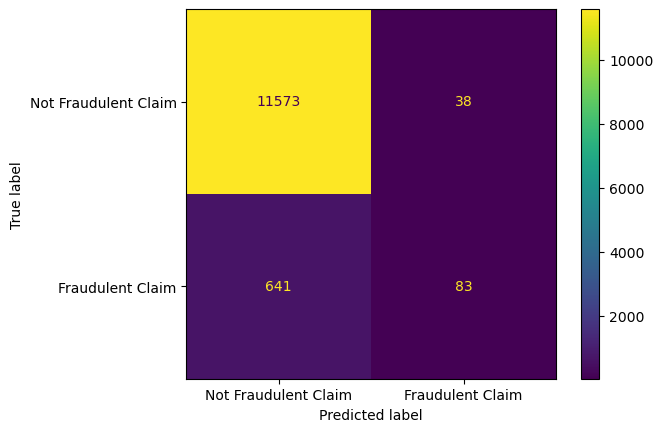

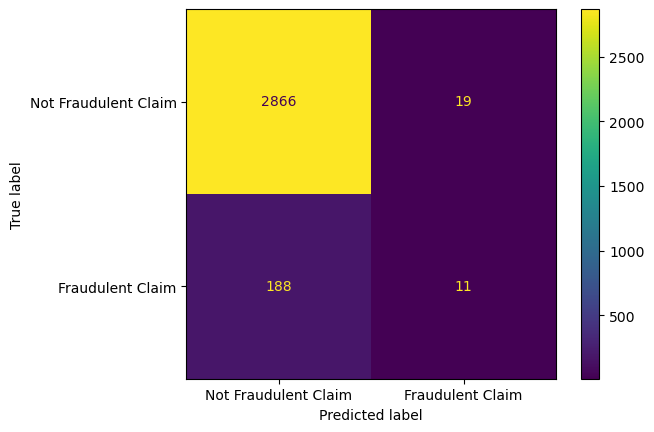

In [86]:
DT_model= DecisionTreeClassifier(criterion= 'gini', max_depth= 10,min_samples_leaf=10,
                                   min_samples_split=10,
                                   random_state=42,
                                   splitter='best',)
DT_model_df= DT_model.fit(X1_train, Y1_train)

# prediction with baseline

DT_predictions_train = DT_model_df.predict(X1_train)
DT_predictions = DT_model_df.predict(X1_test)

# the confusion Mat for training and testing

confusion_mat = metrics.confusion_matrix(Y1_train, DT_predictions_train)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=["Not Fraudulent Claim", "Fraudulent Claim"])
disp.plot()
plt.savefig('CM1_DT_S2_plots.pdf', bbox_inches='tight', format='pdf', transparent=True, append=True)
#plt.close()

confusion_mat = metrics.confusion_matrix(Y1_test,DT_predictions)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_mat,display_labels=["Not Fraudulent Claim", "Fraudulent Claim"])
disp.plot()
plt.savefig('CM2_DT_S2_plots.pdf', bbox_inches='tight', format='pdf', transparent=True, append=True)
#plt.close()

model_name = 'DT Classifier'

#Train Evaluation baseline
Accuracy_Train= metrics.accuracy_score(Y1_train, DT_predictions_train)
f1_score_Train= metrics.f1_score(Y1_train, DT_predictions_train)
recall_score_Train= metrics.recall_score(Y1_train, DT_predictions_train)
precision_score_Train= metrics.precision_score(Y1_train, DT_predictions_train)
roc_auc_score_Train= metrics.roc_auc_score(Y1_train, DT_predictions_train)

#Test Evaluation 
tn, fp, fn, tp = metrics.confusion_matrix(Y1_test, DT_predictions).ravel()
Accuracy_Test= metrics.accuracy_score(Y1_test, DT_predictions)
f1_score_Test= metrics.f1_score(Y1_test, DT_predictions)
recall_score_Test= metrics.recall_score(Y1_test, DT_predictions)
precision_score_Test= metrics.precision_score(Y1_test, DT_predictions)
roc_auc_score_Test= metrics.roc_auc_score(Y1_test, DT_predictions)


# Organize the data into lists
evaluation_type = ['Train', 'Test']
accuracy = [Accuracy_Train, Accuracy_Test]
f1_score = [f1_score_Train, f1_score_Test]
recall_score = [recall_score_Train, recall_score_Test]
precision_score = [precision_score_Train, precision_score_Test]
roc_auc_score = [roc_auc_score_Train, roc_auc_score_Test]

# Create a DataFrame
DT_evaluation = pd.DataFrame({
    'Model': [model_name, model_name],
    'Evaluation Type': evaluation_type,
    'Accuracy': accuracy,
    'F1 Score': f1_score,
    'Recall Score': recall_score,
    'Precision Score': precision_score,
    'ROC AUC Score': roc_auc_score
})

# Print the DataFrame
DT= pd.DataFrame(DT_evaluation)
DT


0.5556840626934546
0.5243452966740113


C:\Users\Eyadُُ\AppData\Local\Temp\ipykernel_16320\741222407.py:29: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "append" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('ROC_DT_S2_plots.pdf', bbox_inches='tight', format='pdf', transparent=True, append=True)


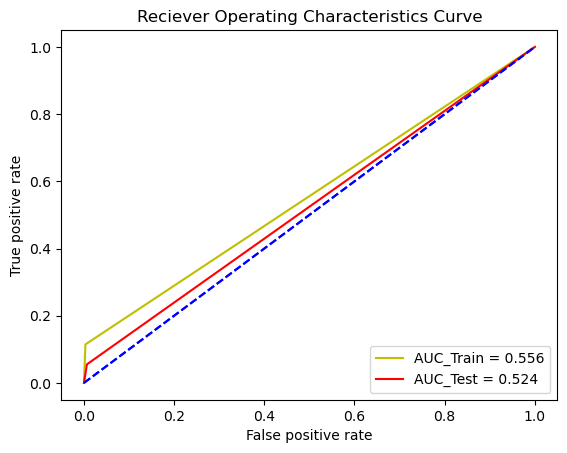

In [87]:
# plotting the ROC curve for training
frp_train,trp_train, threshold = roc_curve(Y1_train,DT_predictions_train)
roc_auc_train = auc(frp_train,trp_train)
plt.title('Reciever Operating Characteristics Curve')
plt.plot(frp_train,trp_train,'y',label = 'AUC_Train = %0.3f' % roc_auc_train)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'b--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')

area_under_roc_curve_train = metrics.auc(frp_train,trp_train)
print (area_under_roc_curve_train)


# plotting the ROC curve for testing
frp_test,trp_test, threshold = roc_curve(Y1_test,DT_predictions)

roc_auc_test = auc(frp_test,trp_test)
plt.title('Reciever Operating Characteristics Curve')
plt.plot(frp_test,trp_test,'r',label = 'AUC_Test = %0.3f' % roc_auc_test)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'b--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')

area_under_roc_curve_test = metrics.auc(frp_test,trp_test)
print (area_under_roc_curve_test)

plt.savefig('ROC_DT_S2_plots.pdf', bbox_inches='tight', format='pdf', transparent=True, append=True)


## 2. Random Forest Classifier

C:\Users\Eyadُُ\AppData\Local\Temp\ipykernel_16320\1288214118.py:13: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "append" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('CM1_RF_S2_plots.pdf', bbox_inches='tight', format='pdf', transparent=True, append=True)
C:\Users\Eyadُُ\AppData\Local\Temp\ipykernel_16320\1288214118.py:20: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "append" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('CM2_RF_S2_plots.pdf', bbox_inches='tight', format='pdf', transparent=True, append=True)


Model Evaluation Type  Accuracy  F1 Score  Recall Score  \
0  RF Classifier           Train  0.989299  0.899848      0.819061   
1  RF Classifier            Test  0.934176  0.037915      0.020101   

   Precision Score  ROC AUC Score  
0         0.998316       0.909487  
1         0.333333       0.508664

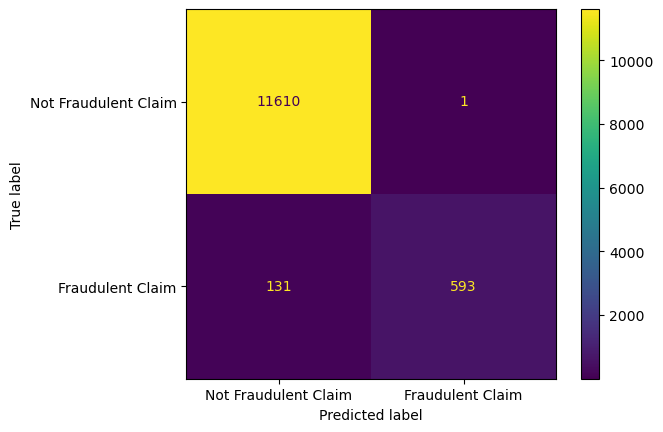

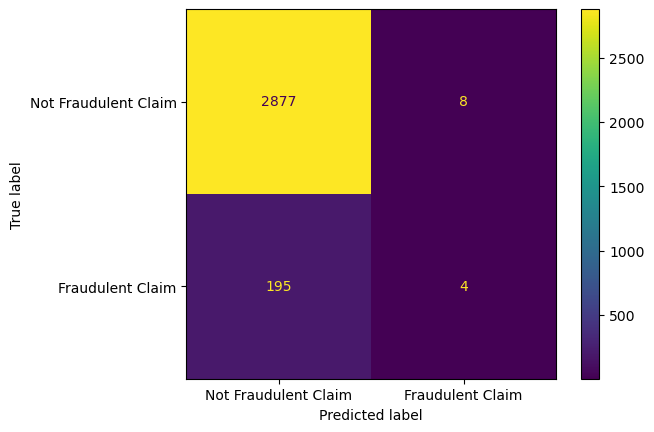

In [88]:
RF_model= RandomForestClassifier(n_estimators=10, random_state=42)

RF_model_df= RF_model.fit(X1_train, Y1_train)

RF_predictions_train = RF_model_df.predict(X1_train)
RF_predictions = RF_model_df.predict(X1_test)

# the confusion Mat for training and testing

confusion_mat = metrics.confusion_matrix(Y1_train, RF_predictions_train)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_mat,display_labels=["Not Fraudulent Claim", "Fraudulent Claim"])
disp.plot()
plt.savefig('CM1_RF_S2_plots.pdf', bbox_inches='tight', format='pdf', transparent=True, append=True)



confusion_mat = metrics.confusion_matrix(Y1_test,RF_predictions)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_mat,display_labels=["Not Fraudulent Claim", "Fraudulent Claim"])
disp.plot()
plt.savefig('CM2_RF_S2_plots.pdf', bbox_inches='tight', format='pdf', transparent=True, append=True)



model_name = 'RF Classifier'

#Train Evaluation 
Accuracy_Train= metrics.accuracy_score(Y1_train, RF_predictions_train)
f1_score_Train= metrics.f1_score(Y1_train, RF_predictions_train)
recall_score_Train= metrics.recall_score(Y1_train, RF_predictions_train)
precision_score_Train= metrics.precision_score(Y1_train, RF_predictions_train)
roc_auc_score_Train= metrics.roc_auc_score(Y1_train, RF_predictions_train)

#Test Evaluation 
tn, fp, fn, tp = metrics.confusion_matrix(Y1_test, RF_predictions).ravel()
Accuracy_Test= metrics.accuracy_score(Y1_test, RF_predictions)
f1_score_Test= metrics.f1_score(Y1_test, RF_predictions)
recall_score_Test= metrics.recall_score(Y1_test, RF_predictions)
precision_score_Test= metrics.precision_score(Y1_test, RF_predictions)
roc_auc_score_Test= metrics.roc_auc_score(Y1_test, RF_predictions)


# Organize the data into lists
evaluation_type = ['Train', 'Test']
accuracy = [Accuracy_Train, Accuracy_Test]
f1_score = [f1_score_Train, f1_score_Test]
recall_score = [recall_score_Train, recall_score_Test]
precision_score = [precision_score_Train, precision_score_Test]
roc_auc_score = [roc_auc_score_Train, roc_auc_score_Test]

# Create a DataFrame
RF_evaluation = pd.DataFrame({
    'Model': [model_name, model_name],
    'Evaluation Type': evaluation_type,
    'Accuracy': accuracy,
    'F1 Score': f1_score,
    'Recall Score': recall_score,
    'Precision Score': precision_score,
    'ROC AUC Score': roc_auc_score
})

# Print the DataFrame
RF= pd.DataFrame(RF_evaluation)
RF

0.9094873241272922
0.5086637694538552


C:\Users\Eyadُُ\AppData\Local\Temp\ipykernel_16320\3734599290.py:29: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "append" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('ROC_RF_S2_plots.pdf', bbox_inches='tight', format='pdf', transparent=True, append=True)


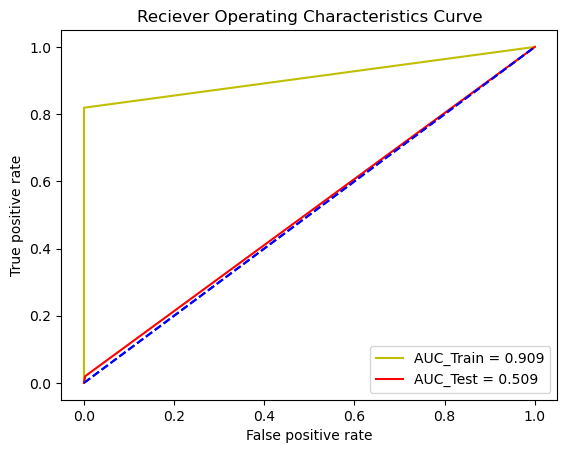

In [89]:
# plotting the ROC curve for training
frp_train,trp_train, threshold = roc_curve(Y1_train,RF_predictions_train)
roc_auc_train = auc(frp_train,trp_train)
plt.title('Reciever Operating Characteristics Curve')
plt.plot(frp_train,trp_train,'y',label = 'AUC_Train = %0.3f' % roc_auc_train)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'b--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')

area_under_roc_curve_train = metrics.auc(frp_train,trp_train)
print (area_under_roc_curve_train)


# plotting the ROC curve for testing
frp_test,trp_test, threshold = roc_curve(Y1_test,RF_predictions)

roc_auc_test = auc(frp_test,trp_test)
plt.title('Reciever Operating Characteristics Curve')
plt.plot(frp_test,trp_test,'r',label = 'AUC_Test = %0.3f' % roc_auc_test)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'b--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')

area_under_roc_curve_test = metrics.auc(frp_test,trp_test)
print (area_under_roc_curve_test)

plt.savefig('ROC_RF_S2_plots.pdf', bbox_inches='tight', format='pdf', transparent=True, append=True)


## 3. AdaBoost Classifier

C:\Users\Eyadُُ\AppData\Local\Temp\ipykernel_16320\2831627991.py:13: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "append" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('CM1_AdaBoost_S2_plots.pdf', bbox_inches='tight', format='pdf', transparent=True, append=True)
C:\Users\Eyadُُ\AppData\Local\Temp\ipykernel_16320\2831627991.py:19: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "append" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('CM2_AdaBoost_S2_plots.pdf', bbox_inches='tight', format='pdf', transparent=True, append=True)


Model Evaluation Type  Accuracy  F1 Score  Recall Score  \
0  AdaBoost Classifier           Train  0.936522  0.034525      0.019337   
1  AdaBoost Classifier            Test  0.929313  0.018018      0.010050   

   Precision Score  ROC AUC Score  
0         0.160920       0.506525  
1         0.086957       0.501386

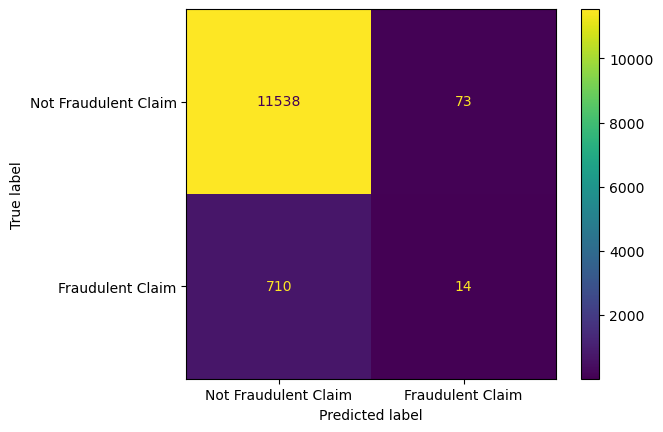

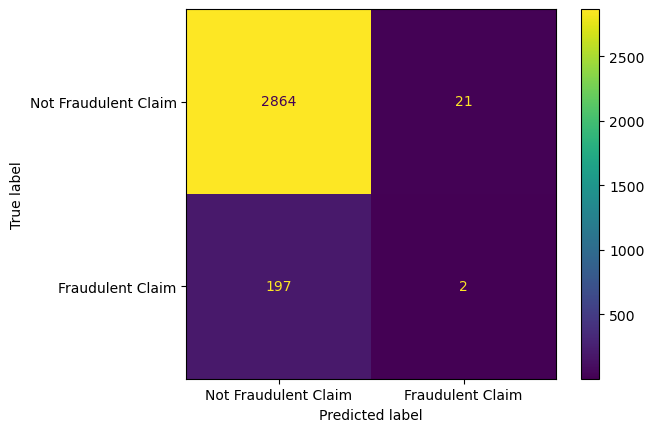

In [90]:
AdaBoost_model = AdaBoostClassifier(random_state=42)

AdaBoost_model_df = AdaBoost_model.fit(X1_train, Y1_train)

AdaBoost_predictions_train = AdaBoost_model_df.predict(X1_train)
AdaBoost_predictions = AdaBoost_model_df.predict(X1_test)

# the confusion Mat for training and testing

confusion_mat = metrics.confusion_matrix(Y1_train, AdaBoost_predictions_train)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_mat,display_labels=["Not Fraudulent Claim", "Fraudulent Claim"])
disp.plot()
plt.savefig('CM1_AdaBoost_S2_plots.pdf', bbox_inches='tight', format='pdf', transparent=True, append=True)


confusion_mat = metrics.confusion_matrix(Y1_test,AdaBoost_predictions)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_mat,display_labels=["Not Fraudulent Claim", "Fraudulent Claim"])
disp.plot()
plt.savefig('CM2_AdaBoost_S2_plots.pdf', bbox_inches='tight', format='pdf', transparent=True, append=True)


model_name = 'AdaBoost Classifier'

#Train Evaluation 
Accuracy_Train= metrics.accuracy_score(Y1_train, AdaBoost_predictions_train)
f1_score_Train= metrics.f1_score(Y1_train, AdaBoost_predictions_train)
recall_score_Train= metrics.recall_score(Y1_train, AdaBoost_predictions_train)
precision_score_Train= metrics.precision_score(Y1_train, AdaBoost_predictions_train)
roc_auc_score_Train= metrics.roc_auc_score(Y1_train, AdaBoost_predictions_train)

#Test Evaluation 
tn, fp, fn, tp = metrics.confusion_matrix(Y1_test, AdaBoost_predictions).ravel()
Accuracy_Test= metrics.accuracy_score(Y1_test, AdaBoost_predictions)
f1_score_Test= metrics.f1_score(Y1_test, AdaBoost_predictions)
recall_score_Test= metrics.recall_score(Y1_test, AdaBoost_predictions)
precision_score_Test= metrics.precision_score(Y1_test, AdaBoost_predictions)
roc_auc_score_Test= metrics.roc_auc_score(Y1_test, AdaBoost_predictions)


# Organize the data into lists
evaluation_type = ['Train', 'Test']
accuracy = [Accuracy_Train, Accuracy_Test]
f1_score = [f1_score_Train, f1_score_Test]
recall_score = [recall_score_Train, recall_score_Test]
precision_score = [precision_score_Train, precision_score_Test]
roc_auc_score = [roc_auc_score_Train, roc_auc_score_Test]

# Create a DataFrame
AdaBoost_evaluation = pd.DataFrame({
    'Model': [model_name, model_name],
    'Evaluation Type': evaluation_type,
    'Accuracy': accuracy,
    'F1 Score': f1_score,
    'Recall Score': recall_score,
    'Precision Score': precision_score,
    'ROC AUC Score': roc_auc_score
})

# Print the DataFrame
AdaBoost= pd.DataFrame(AdaBoost_evaluation)
AdaBoost

0.5065249375354196
0.5013856108967716


C:\Users\Eyadُُ\AppData\Local\Temp\ipykernel_16320\1924038043.py:29: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "append" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('ROC_AdaBoost_S2_plots.pdf', bbox_inches='tight', format='pdf', transparent=True, append=True)


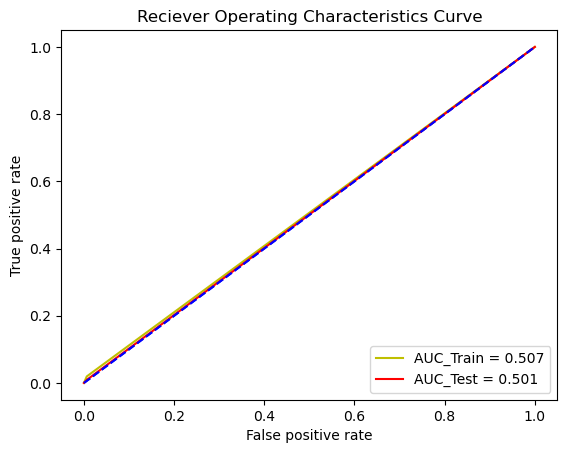

In [91]:
# plotting the ROC curve for training
frp_train,trp_train, threshold = roc_curve(Y1_train,AdaBoost_predictions_train)
roc_auc_train = auc(frp_train,trp_train)
plt.title('Reciever Operating Characteristics Curve')
plt.plot(frp_train,trp_train,'y',label = 'AUC_Train = %0.3f' % roc_auc_train)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'b--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')

area_under_roc_curve_train = metrics.auc(frp_train,trp_train)
print (area_under_roc_curve_train)


# plotting the ROC curve for testing
frp_test,trp_test, threshold = roc_curve(Y1_test,AdaBoost_predictions)

roc_auc_test = auc(frp_test,trp_test)
plt.title('Reciever Operating Characteristics Curve')
plt.plot(frp_test,trp_test,'r',label = 'AUC_Test = %0.3f' % roc_auc_test)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'b--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')

area_under_roc_curve_test = metrics.auc(frp_test,trp_test)
print (area_under_roc_curve_test)

plt.savefig('ROC_AdaBoost_S2_plots.pdf', bbox_inches='tight', format='pdf', transparent=True, append=True)


## 4. Gradient Boosting Classifier

C:\Users\Eyadُُ\AppData\Local\Temp\ipykernel_16320\2152283041.py:13: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "append" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('CM1_GB_S2_plots.pdf', bbox_inches='tight', format='pdf', transparent=True, append=True)
C:\Users\Eyadُُ\AppData\Local\Temp\ipykernel_16320\2152283041.py:19: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "append" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('CM2_GB_S2_plots.pdf', bbox_inches='tight', format='pdf', transparent=True, append=True)


Model Evaluation Type  Accuracy  F1 Score  Recall Score  \
0  GB Classifier           Train  0.944224  0.099476      0.052486   
1  GB Classifier            Test  0.937095  0.049020      0.025126   

   Precision Score  ROC AUC Score  
0             0.95       0.526157  
1             1.00       0.512563

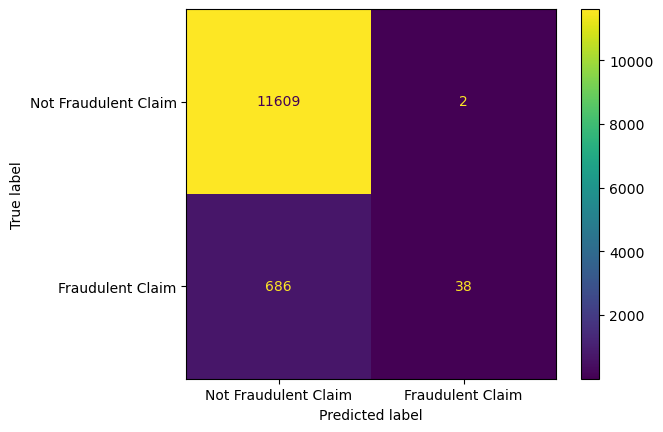

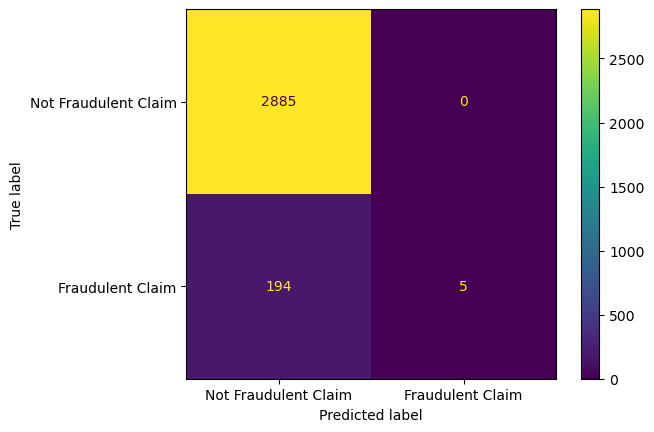

In [92]:
GB_model= GradientBoostingClassifier(random_state=42)
GB_model_df= GB_model.fit(X1_train, Y1_train)

GB_predictions_train = GB_model_df.predict(X1_train)
GB_predictions = GB_model_df.predict(X1_test)


# the confusion Mat for training and testing

confusion_mat = metrics.confusion_matrix(Y1_train, GB_predictions_train)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_mat,display_labels=["Not Fraudulent Claim", "Fraudulent Claim"])
disp.plot()
plt.savefig('CM1_GB_S2_plots.pdf', bbox_inches='tight', format='pdf', transparent=True, append=True)


confusion_mat = metrics.confusion_matrix(Y1_test,GB_predictions)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_mat,display_labels=["Not Fraudulent Claim", "Fraudulent Claim"])
disp.plot()
plt.savefig('CM2_GB_S2_plots.pdf', bbox_inches='tight', format='pdf', transparent=True, append=True)



model_name = 'GB Classifier'

#Train Evaluation 
Accuracy_Train= metrics.accuracy_score(Y1_train, GB_predictions_train)
f1_score_Train= metrics.f1_score(Y1_train, GB_predictions_train)
recall_score_Train= metrics.recall_score(Y1_train, GB_predictions_train)
precision_score_Train= metrics.precision_score(Y1_train, GB_predictions_train)
roc_auc_score_Train= metrics.roc_auc_score(Y1_train, GB_predictions_train)

#Test Evaluation 
tn, fp, fn, tp = metrics.confusion_matrix(Y1_test, GB_predictions).ravel()
Accuracy_Test= metrics.accuracy_score(Y1_test, GB_predictions)
f1_score_Test= metrics.f1_score(Y1_test, GB_predictions)
recall_score_Test= metrics.recall_score(Y1_test, GB_predictions)
precision_score_Test= metrics.precision_score(Y1_test, GB_predictions)
roc_auc_score_Test= metrics.roc_auc_score(Y1_test, GB_predictions)

# Organize the data into lists
evaluation_type = ['Train', 'Test']
accuracy = [Accuracy_Train, Accuracy_Test]
f1_score = [f1_score_Train, f1_score_Test]
recall_score = [recall_score_Train, recall_score_Test]
precision_score = [precision_score_Train, precision_score_Test]
roc_auc_score = [roc_auc_score_Train, roc_auc_score_Test]

# Create a DataFrame
GB_evaluation = pd.DataFrame({
    'Model': [model_name, model_name],
    'Evaluation Type': evaluation_type,
    'Accuracy': accuracy,
    'F1 Score': f1_score,
    'Recall Score': recall_score,
    'Precision Score': precision_score,
    'ROC AUC Score': roc_auc_score
})

# Print the DataFrame
GB= pd.DataFrame(GB_evaluation)
GB

0.5261569686965731
0.5125628140703518


C:\Users\Eyadُُ\AppData\Local\Temp\ipykernel_16320\3122023790.py:29: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "append" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('ROC_GB_S2_plots.pdf', bbox_inches='tight', format='pdf', transparent=True, append=True)


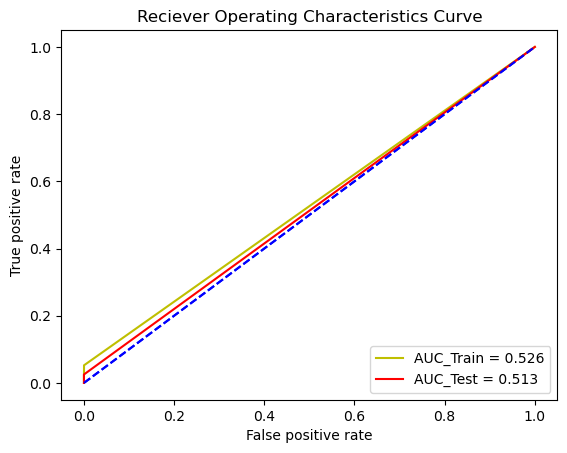

In [93]:
# plotting the ROC curve for training
frp_train,trp_train, threshold = roc_curve(Y1_train,GB_predictions_train)
roc_auc_train = auc(frp_train,trp_train)
plt.title('Reciever Operating Characteristics Curve')
plt.plot(frp_train,trp_train,'y',label = 'AUC_Train = %0.3f' % roc_auc_train)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'b--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')

area_under_roc_curve_train = metrics.auc(frp_train,trp_train)
print (area_under_roc_curve_train)


# plotting the ROC curve for testing
frp_test,trp_test, threshold = roc_curve(Y1_test,GB_predictions)

roc_auc_test = auc(frp_test,trp_test)
plt.title('Reciever Operating Characteristics Curve')
plt.plot(frp_test,trp_test,'r',label = 'AUC_Test = %0.3f' % roc_auc_test)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'b--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')

area_under_roc_curve_test = metrics.auc(frp_test,trp_test)
print (area_under_roc_curve_test)

plt.savefig('ROC_GB_S2_plots.pdf', bbox_inches='tight', format='pdf', transparent=True, append=True)


## 5. Bagging Classifier

C:\Users\Eyadُُ\AppData\Local\Temp\ipykernel_16320\1248018461.py:13: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "append" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('CM1_Bagging_S2_plots.pdf', bbox_inches='tight', format='pdf', transparent=True, append=True)
C:\Users\Eyadُُ\AppData\Local\Temp\ipykernel_16320\1248018461.py:19: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "append" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('CM2_Bagging_S2_plots.pdf', bbox_inches='tight', format='pdf', transparent=True, append=True)


Model Evaluation Type  Accuracy  F1 Score  Recall Score  \
0  Bagging Classifier           Train  0.991163  0.918596      0.849448   
1  Bagging Classifier            Test  0.929961  0.084746      0.050251   

   Precision Score  ROC AUC Score  
0          1.00000       0.924724  
1          0.27027       0.520446

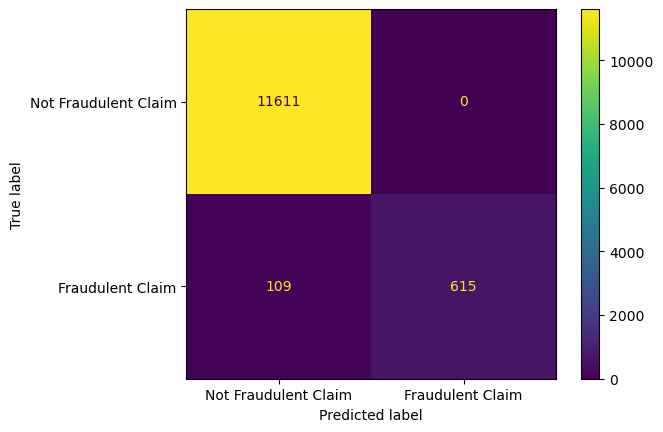

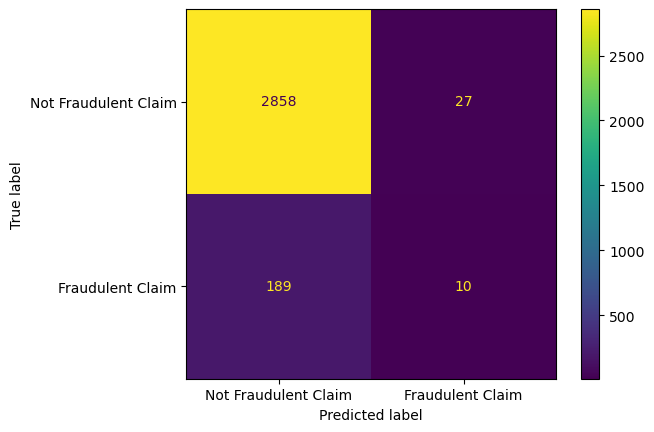

In [94]:
Bagging_model= BaggingClassifier(DecisionTreeClassifier(random_state=42))
Bagging_model_df= Bagging_model.fit(X1_train, Y1_train)

Bagging_predictions_train = Bagging_model_df.predict(X1_train)
Bagging_predictions = Bagging_model_df.predict(X1_test)


# the confusion Mat for training and testing

confusion_mat = metrics.confusion_matrix(Y1_train, Bagging_predictions_train)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_mat,display_labels=["Not Fraudulent Claim", "Fraudulent Claim"])
disp.plot()
plt.savefig('CM1_Bagging_S2_plots.pdf', bbox_inches='tight', format='pdf', transparent=True, append=True)


confusion_mat = metrics.confusion_matrix(Y1_test,Bagging_predictions)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_mat,display_labels=["Not Fraudulent Claim", "Fraudulent Claim"])
disp.plot()
plt.savefig('CM2_Bagging_S2_plots.pdf', bbox_inches='tight', format='pdf', transparent=True, append=True)



model_name = 'Bagging Classifier'

#Train Evaluation 
Accuracy_Train= metrics.accuracy_score(Y1_train, Bagging_predictions_train)
f1_score_Train= metrics.f1_score(Y1_train, Bagging_predictions_train)
recall_score_Train= metrics.recall_score(Y1_train, Bagging_predictions_train)
precision_score_Train= metrics.precision_score(Y1_train, Bagging_predictions_train)
roc_auc_score_Train= metrics.roc_auc_score(Y1_train, Bagging_predictions_train)

#Test Evaluation 
tn, fp, fn, tp = metrics.confusion_matrix(Y1_test, Bagging_predictions).ravel()
Accuracy_Test= metrics.accuracy_score(Y1_test, Bagging_predictions)
f1_score_Test= metrics.f1_score(Y1_test, Bagging_predictions)
recall_score_Test= metrics.recall_score(Y1_test, Bagging_predictions)
precision_score_Test= metrics.precision_score(Y1_test, Bagging_predictions)
roc_auc_score_Test= metrics.roc_auc_score(Y1_test, Bagging_predictions)

# Organize the data into lists
evaluation_type = ['Train', 'Test']
accuracy = [Accuracy_Train, Accuracy_Test]
f1_score = [f1_score_Train, f1_score_Test]
recall_score = [recall_score_Train, recall_score_Test]
precision_score = [precision_score_Train, precision_score_Test]
roc_auc_score = [roc_auc_score_Train, roc_auc_score_Test]

# Create a DataFrame
Bagging_evaluation = pd.DataFrame({
    'Model': [model_name, model_name],
    'Evaluation Type': evaluation_type,
    'Accuracy': accuracy,
    'F1 Score': f1_score,
    'Recall Score': recall_score,
    'Precision Score': precision_score,
    'ROC AUC Score': roc_auc_score
})

# Print the DataFrame
Bagging= pd.DataFrame(Bagging_evaluation)
Bagging

0.9247237569060773
0.5204462520575146


C:\Users\Eyadُُ\AppData\Local\Temp\ipykernel_16320\3302650263.py:29: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "append" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('ROC_Bagging_S2_plots.pdf', bbox_inches='tight', format='pdf', transparent=True, append=True)


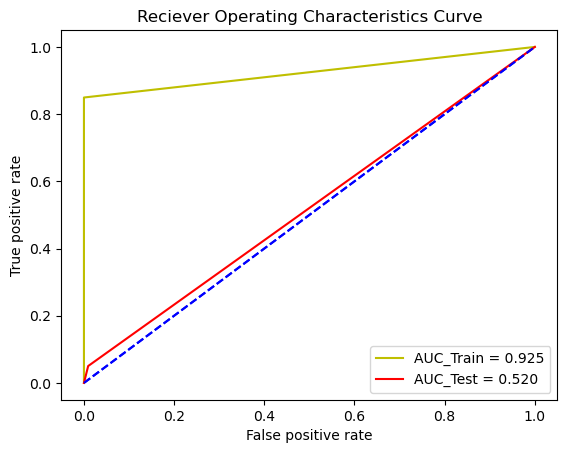

In [95]:
# plotting the ROC curve for training
frp_train,trp_train, threshold = roc_curve(Y1_train,Bagging_predictions_train)
roc_auc_train = auc(frp_train,trp_train)
plt.title('Reciever Operating Characteristics Curve')
plt.plot(frp_train,trp_train,'y',label = 'AUC_Train = %0.3f' % roc_auc_train)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'b--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')

area_under_roc_curve_train = metrics.auc(frp_train,trp_train)
print (area_under_roc_curve_train)


# plotting the ROC curve for testing
frp_test,trp_test, threshold = roc_curve(Y1_test,Bagging_predictions)

roc_auc_test = auc(frp_test,trp_test)
plt.title('Reciever Operating Characteristics Curve')
plt.plot(frp_test,trp_test,'r',label = 'AUC_Test = %0.3f' % roc_auc_test)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'b--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')

area_under_roc_curve_test = metrics.auc(frp_test,trp_test)
print (area_under_roc_curve_test)

plt.savefig('ROC_Bagging_S2_plots.pdf', bbox_inches='tight', format='pdf', transparent=True, append=True)


# Comparsion All Models

In [96]:
dfs = [DT, RF, AdaBoost, GB, Bagging] 

# Concatenate the DataFrames vertically
Results_S2 = pd.concat(dfs, ignore_index=True)

# Define the file path where you want to save the Excel file
file_path = "Results_S2.xlsx"

# Save the DataFrame to an Excel file
Results_S2.to_excel(file_path, index=False)

# Print the merged DataFrame
pd.DataFrame(Results_S2)

Model Evaluation Type  Accuracy  F1 Score  Recall Score  \
0        DT Classifier           Train  0.944953  0.196450      0.114641   
1        DT Classifier            Test  0.932879  0.096070      0.055276   
2        RF Classifier           Train  0.989299  0.899848      0.819061   
3        RF Classifier            Test  0.934176  0.037915      0.020101   
4  AdaBoost Classifier           Train  0.936522  0.034525      0.019337   
5  AdaBoost Classifier            Test  0.929313  0.018018      0.010050   
6        GB Classifier           Train  0.944224  0.099476      0.052486   
7        GB Classifier            Test  0.937095  0.049020      0.025126   
8   Bagging Classifier           Train  0.991163  0.918596      0.849448   
9   Bagging Classifier            Test  0.929961  0.084746      0.050251   

   Precision Score  ROC AUC Score  
0         0.685950       0.555684  
1         0.366667       0.524345  
2         0.998316       0.909487  
3         0.333333       0.508664  
4         0.160920       0.506525  
5         0.086957       0.501386  
6         0.950000       0.526157  
7         1.000000       0.512563  
8         1.000000       0.924724  
9         0.270270       0.520446

# Second dataset

# 1) Import data, Explotary data analysis, and data processing

## 1.1 Import Data

In [98]:
df2 = pd.read_csv('the second dataset Claims_data.csv', delimiter=";")

df2

ID         BIRTH   AGE  GENDER              EDUCATION  \
0       63581743    16-مارس-39  60.0    Male                    PhD   
1      132761049   21-يناير-56  43.0    Male            High School   
2      921317019  18-نوفمبر-51  48.0    Male              Bachelors   
3      727598473    05-مارس-64  35.0  Female            High School   
4      450221861   05-يونيو-48  51.0    Male  Less than High School   
...          ...           ...   ...     ...                    ...   
10297   67790126   13-أغسطس-54  45.0    Male                    PhD   
10298   61970712   17-يونيو-53  46.0    Male                Masters   
10299  849208064   18-يونيو-51  48.0  Female  Less than High School   
10300  627828331  12-ديسمبر-48  50.0  Female              Bachelors   
10301  680381960  27-فبراير-47  52.0  Female            High School   

         OCCUPATION   YOJ  TRAVTIME MSTATUS PARENT1  ...     CAR_TYPE RED_CAR  \
0      Professional  11.0        14      No      No  ...      Minivan     yes   
1       Blue Collar  11.0        22      No      No  ...      Minivan     yes   
2           Manager  11.0        26      No      No  ...          Van     yes   
3          Clerical  10.0         5     Yes      No  ...          SUV      no   
4       Blue Collar  14.0        32     Yes      No  ...      Minivan     yes   
...             ...   ...       ...     ...     ...  ...          ...     ...   
10297       Manager   9.0        21     Yes      No  ...      Minivan      no   
10298           NaN   9.0        36     Yes      No  ...  Panel Truck      no   
10299   Blue Collar  15.0        12     Yes      No  ...          SUV      no   
10300    Home Maker   7.0        36     Yes      No  ...      Minivan      no   
10301      Clerical  11.0        64     Yes      No  ...      Minivan      no   

       OLDCLAIM CLM_FREQ REVOKED  MVR_PTS CLM_AMT CAR_AGE  \
0       $4,461         2      No        3     $0     18.0   
1           $0         0      No        0     $0      1.0   
2           $0         0      No        2     $0     10.0   
3      $38,690         2      No        3     $0     10.0   
4           $0         0      No        0     $0      6.0   
...         ...      ...     ...      ...     ...     ...   
10297       $0         0      No        2     $0     17.0   
10298       $0         0      No        0     $0      1.0   
10299       $0         0      No        0     $0      1.0   
10300       $0         0      No        0     $0     11.0   
10301       $0         0      No        0     $0      9.0   

                URBANICITY  CLAIM_FLAG  
0      Highly Urban/ Urban           0  
1      Highly Urban/ Urban           0  
2      Highly Urban/ Urban           0  
3      Highly Urban/ Urban           0  
4      Highly Urban/ Urban           0  
...                    ...         ...  
10297  Highly Urban/ Urban           0  
10298  Highly Urban/ Urban           0  
10299  Highly Urban/ Urban           0  
10300  Highly Urban/ Urban           0  
10301  Highly Rural/ Rural           0  

[10302 rows x 26 columns]

In [99]:
df2.shape

(10302, 26)

## 1.2 The descriptive analysis

In [94]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10302 entries, 0 to 10301
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          10302 non-null  int64  
 1   BIRTH       10302 non-null  object 
 2   AGE         10295 non-null  float64
 3   GENDER      10302 non-null  object 
 4   EDUCATION   10302 non-null  object 
 5   OCCUPATION  9637 non-null   object 
 6   YOJ         9754 non-null   float64
 7   TRAVTIME    10302 non-null  int64  
 8   MSTATUS     10302 non-null  object 
 9   PARENT1     10302 non-null  object 
 10  HOME_VAL    9727 non-null   object 
 11  INCOME      9732 non-null   object 
 12  KIDSDRIV    10302 non-null  int64  
 13  CAR_USE     10302 non-null  object 
 14  BLUEBOOK    10302 non-null  object 
 15  TIF         10302 non-null  int64  
 16  CAR_TYPE    10302 non-null  object 
 17  RED_CAR     10302 non-null  object 
 18  OLDCLAIM    10302 non-null  object 
 19  CLM_FREQ    10302 non-nul

In [95]:
# printing unique values of each column
for col in df2.columns:
    print(f"{col}: \n{df2[col].unique()}\n")

ID: 
[ 63581743 132761049 921317019 ...  67790126 849208064 680381960]

BIRTH: 
['16-مارس-39' '21-يناير-56' '18-نوفمبر-51' ... '13-أغسطس-54' '18-يونيو-51'
 '27-فبراير-47']

AGE: 
[60. 43. 48. 35. 51. 50. 34. 54. 40. 44. 37. 53. 55. 45. 39. 59. 42. 31.
 28. 47. 46. 33. 32. 49. 36. 52. 41. 56. 38. 63. 62. 30. 29. 58. 64. 66.
 26. 61. 80. 57. nan 25. 27. 20. 21. 19. 72. 69. 24. 67. 22. 23. 65. 70.
 17. 16. 81. 73. 71. 68. 18. 76.]

GENDER: 
['Male' 'Female']

EDUCATION: 
['PhD' 'High School' 'Bachelors' 'Less than High School' 'Masters']

OCCUPATION: 
['Professional' 'Blue Collar' 'Manager' 'Clerical' 'Doctor' 'Lawyer' nan
 'Home Maker' 'Student']

YOJ: 
[11. 10. 14. nan 12.  7.  5.  0. 13.  9. 17.  8. 15. 16.  6. 18. 23.  4.
  3.  2. 19.  1.]

TRAVTIME: 
[ 14  22  26   5  32  36  46  33  21  30  44  34  48  15  25  64  74  43
  45  42  27  29  52   8   7  16  37  12  38  65  18  47  10  40  62  35
  24  20  50  13  31  28  11   9  57  49  61  41  23  59  17  63  53  68
  54  60  39  69  

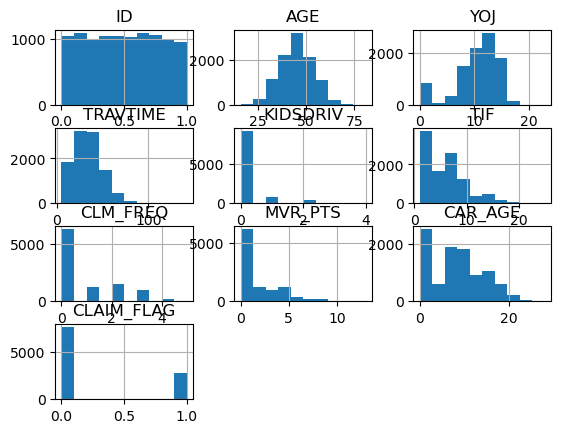

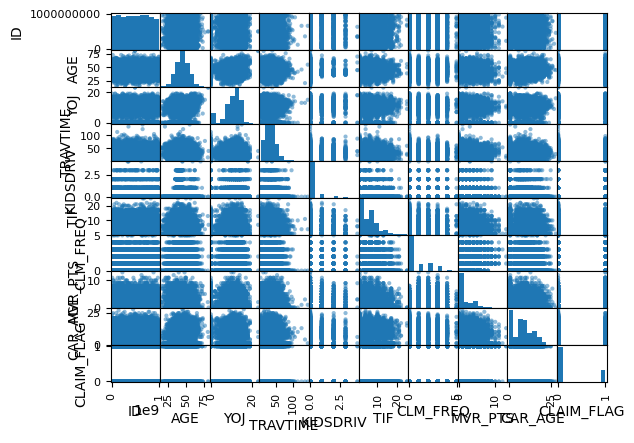

In [6]:
df2.hist()
scatter_matrix(df2)
plt.show()

## 1.3 Check missing data and handeling, Check the duplicate in the dataset

In [100]:
# removing columns which not important and repeated ("ID" , "BIRTH")
df2 = df2.drop(columns =["ID","BIRTH", "CLM_AMT"])
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10302 entries, 0 to 10301
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   AGE         10295 non-null  float64
 1   GENDER      10302 non-null  object 
 2   EDUCATION   10302 non-null  object 
 3   OCCUPATION  9637 non-null   object 
 4   YOJ         9754 non-null   float64
 5   TRAVTIME    10302 non-null  int64  
 6   MSTATUS     10302 non-null  object 
 7   PARENT1     10302 non-null  object 
 8   HOME_VAL    9727 non-null   object 
 9   INCOME      9732 non-null   object 
 10  KIDSDRIV    10302 non-null  int64  
 11  CAR_USE     10302 non-null  object 
 12  BLUEBOOK    10302 non-null  object 
 13  TIF         10302 non-null  int64  
 14  CAR_TYPE    10302 non-null  object 
 15  RED_CAR     10302 non-null  object 
 16  OLDCLAIM    10302 non-null  object 
 17  CLM_FREQ    10302 non-null  int64  
 18  REVOKED     10302 non-null  object 
 19  MVR_PTS     10302 non-nul

In [101]:
# Percentage of missing data for each feature # we can see some missing values denoted by '?' so lets replace missing values with np.nan

df2.replace('none', np.nan, inplace = True)
print(df2.isna().sum().sort_values(ascending=False) / len(df2) * 100)

OCCUPATION    6.455057
CAR_AGE       6.202679
HOME_VAL      5.581440
INCOME        5.532906
YOJ           5.319355
AGE           0.067948
CAR_TYPE      0.000000
URBANICITY    0.000000
MVR_PTS       0.000000
REVOKED       0.000000
CLM_FREQ      0.000000
OLDCLAIM      0.000000
RED_CAR       0.000000
CAR_USE       0.000000
TIF           0.000000
BLUEBOOK      0.000000
GENDER        0.000000
KIDSDRIV      0.000000
PARENT1       0.000000
MSTATUS       0.000000
TRAVTIME      0.000000
EDUCATION     0.000000
CLAIM_FLAG    0.000000
dtype: float64


In [102]:
# another way for checking columns with NAN values

for i,(j,k) in  enumerate(df2.isnull().sum().iteritems()):
    if k:
        print(i,j,k)

0 AGE 7
3 OCCUPATION 665
4 YOJ 548
8 HOME_VAL 575
9 INCOME 570
20 CAR_AGE 639


In [103]:
#handeling the missing values in other columns by fill in with the mode

df2['OCCUPATION'] = df2['OCCUPATION'].fillna(df2['OCCUPATION'].mode()[0])
df2['HOME_VAL'] = df2['HOME_VAL'].fillna(df2['HOME_VAL'].mode()[0])
df2['INCOME'] = df2['INCOME'].fillna(df2['INCOME'].mode()[0])
df2['CAR_AGE'] = df2['CAR_AGE'].fillna(df2['CAR_AGE'].mean())
df2['YOJ'] = df2['YOJ'].fillna(df2['YOJ'].mean())
df2['AGE'] = df2['AGE'].fillna(df2['AGE'].mean())

In [104]:
# Check the missing values in the dataset after handling

print(df2.isna().sum().sort_values(ascending=False) / len(df2) * 100)

AGE           0.0
BLUEBOOK      0.0
URBANICITY    0.0
CAR_AGE       0.0
MVR_PTS       0.0
REVOKED       0.0
CLM_FREQ      0.0
OLDCLAIM      0.0
RED_CAR       0.0
CAR_TYPE      0.0
TIF           0.0
CAR_USE       0.0
GENDER        0.0
KIDSDRIV      0.0
INCOME        0.0
HOME_VAL      0.0
PARENT1       0.0
MSTATUS       0.0
TRAVTIME      0.0
YOJ           0.0
OCCUPATION    0.0
EDUCATION     0.0
CLAIM_FLAG    0.0
dtype: float64


In [105]:
cols = ['INCOME', 'HOME_VAL', 'OLDCLAIM', 'BLUEBOOK']

for col in cols:
        df2[col] = pd.to_numeric(df2[col].str.replace(',', ''). str.replace('$', ''))  
        
df2

C:\Users\Eyadُُ\AppData\Local\Temp\ipykernel_11680\284235430.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df2[col] = pd.to_numeric(df2[col].str.replace(',', ''). str.replace('$', ''))


AGE  GENDER              EDUCATION    OCCUPATION   YOJ  TRAVTIME  \
0      60.0    Male                    PhD  Professional  11.0        14   
1      43.0    Male            High School   Blue Collar  11.0        22   
2      48.0    Male              Bachelors       Manager  11.0        26   
3      35.0  Female            High School      Clerical  10.0         5   
4      51.0    Male  Less than High School   Blue Collar  14.0        32   
...     ...     ...                    ...           ...   ...       ...   
10297  45.0    Male                    PhD       Manager   9.0        21   
10298  46.0    Male                Masters   Blue Collar   9.0        36   
10299  48.0  Female  Less than High School   Blue Collar  15.0        12   
10300  50.0  Female              Bachelors    Home Maker   7.0        36   
10301  52.0  Female            High School      Clerical  11.0        64   

      MSTATUS PARENT1  HOME_VAL  INCOME  ...  TIF     CAR_TYPE  RED_CAR  \
0          No      No         0   67349  ...   11      Minivan      yes   
1          No      No    257252   91449  ...    1      Minivan      yes   
2          No      No         0   52881  ...    1          Van      yes   
3         Yes      No    124191   16039  ...    4          SUV       no   
4         Yes      No    306251       0  ...    7      Minivan      yes   
...       ...     ...       ...     ...  ...  ...          ...      ...   
10297     Yes      No    386273  164669  ...   15      Minivan       no   
10298     Yes      No    332591  107204  ...    6  Panel Truck       no   
10299     Yes      No    170611   39837  ...    7          SUV       no   
10300     Yes      No    149248   43445  ...    6      Minivan       no   
10301     Yes      No    197017   53235  ...    6      Minivan       no   

       OLDCLAIM CLM_FREQ REVOKED  MVR_PTS  CAR_AGE           URBANICITY  \
0          4461        2      No        3     18.0  Highly Urban/ Urban   
1             0        0      No        0      1.0  Highly Urban/ Urban   
2             0        0      No        2     10.0  Highly Urban/ Urban   
3         38690        2      No        3     10.0  Highly Urban/ Urban   
4             0        0      No        0      6.0  Highly Urban/ Urban   
...         ...      ...     ...      ...      ...                  ...   
10297         0        0      No        2     17.0  Highly Urban/ Urban   
10298         0        0      No        0      1.0  Highly Urban/ Urban   
10299         0        0      No        0      1.0  Highly Urban/ Urban   
10300         0        0      No        0     11.0  Highly Urban/ Urban   
10301         0        0      No        0      9.0  Highly Rural/ Rural   

       CLAIM_FLAG  
0               0  
1               0  
2               0  
3               0  
4               0  
...           ...  
10297           0  
10298           0  
10299           0  
10300           0  
10301           0  

[10302 rows x 23 columns]

In [106]:
for col in df2.columns:
    if(df2[col].dtype == "object"):
        df2[col] = df2[col].str.replace('z_', '')
        
df2.head()

AGE  GENDER              EDUCATION    OCCUPATION   YOJ  TRAVTIME MSTATUS  \
0  60.0    Male                    PhD  Professional  11.0        14      No   
1  43.0    Male            High School   Blue Collar  11.0        22      No   
2  48.0    Male              Bachelors       Manager  11.0        26      No   
3  35.0  Female            High School      Clerical  10.0         5     Yes   
4  51.0    Male  Less than High School   Blue Collar  14.0        32     Yes   

  PARENT1  HOME_VAL  INCOME  ...  TIF CAR_TYPE  RED_CAR  OLDCLAIM CLM_FREQ  \
0      No         0   67349  ...   11  Minivan      yes      4461        2   
1      No    257252   91449  ...    1  Minivan      yes         0        0   
2      No         0   52881  ...    1      Van      yes         0        0   
3      No    124191   16039  ...    4      SUV       no     38690        2   
4      No    306251       0  ...    7  Minivan      yes         0        0   

  REVOKED  MVR_PTS  CAR_AGE           URBANICITY  CLAIM_FLAG  
0      No        3     18.0  Highly Urban/ Urban           0  
1      No        0      1.0  Highly Urban/ Urban           0  
2      No        2     10.0  Highly Urban/ Urban           0  
3      No        3     10.0  Highly Urban/ Urban           0  
4      No        0      6.0  Highly Urban/ Urban           0  

[5 rows x 23 columns]

In [107]:
#check the duplicate in the dataset
duplicate = df2[df2.duplicated()]
print("Duplicate Rows :")
print(duplicate)

Duplicate Rows :
       AGE GENDER  EDUCATION    OCCUPATION   YOJ  TRAVTIME MSTATUS PARENT1  \
9801  39.0   Male  Bachelors  Professional  14.0        29     Yes      No   

      HOME_VAL  INCOME  ...  TIF CAR_TYPE  RED_CAR  OLDCLAIM CLM_FREQ REVOKED  \
9801    244764   93077  ...    1  Minivan      yes         0        0      No   

      MVR_PTS  CAR_AGE           URBANICITY  CLAIM_FLAG  
9801        0      1.0  Highly Rural/ Rural           0  

[1 rows x 23 columns]


In [108]:
# Remove duplicate rows

df2.drop_duplicates(inplace=True)

In [109]:
#Check if there are any duplicate in the dataset #there are no duplicate rows
print(len(df2.drop_duplicates())==len(df2))

True


## 1.4 Scaling the numerical features and Encoding the categorical feature

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10301 entries, 0 to 10301
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   AGE         10301 non-null  float64
 1   GENDER      10301 non-null  int64  
 2   EDUCATION   10301 non-null  int64  
 3   OCCUPATION  10301 non-null  int64  
 4   YOJ         10301 non-null  float64
 5   TRAVTIME    10301 non-null  int64  
 6   MSTATUS     10301 non-null  int64  
 7   PARENT1     10301 non-null  int64  
 8   HOME_VAL    10301 non-null  int64  
 9   INCOME      10301 non-null  int64  
 10  KIDSDRIV    10301 non-null  int64  
 11  CAR_USE     10301 non-null  int64  
 12  BLUEBOOK    10301 non-null  int64  
 13  TIF         10301 non-null  int64  
 14  CAR_TYPE    10301 non-null  int64  
 15  RED_CAR     10301 non-null  int64  
 16  OLDCLAIM    10301 non-null  int64  
 17  CLM_FREQ    10301 non-null  int64  
 18  REVOKED     10301 non-null  int64  
 19  MVR_PTS     10301 non-nul

array([[<AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'GENDER'}>,
        <AxesSubplot:title={'center':'EDUCATION'}>,
        <AxesSubplot:title={'center':'OCCUPATION'}>,
        <AxesSubplot:title={'center':'YOJ'}>],
       [<AxesSubplot:title={'center':'TRAVTIME'}>,
        <AxesSubplot:title={'center':'MSTATUS'}>,
        <AxesSubplot:title={'center':'PARENT1'}>,
        <AxesSubplot:title={'center':'HOME_VAL'}>,
        <AxesSubplot:title={'center':'INCOME'}>],
       [<AxesSubplot:title={'center':'KIDSDRIV'}>,
        <AxesSubplot:title={'center':'CAR_USE'}>,
        <AxesSubplot:title={'center':'BLUEBOOK'}>,
        <AxesSubplot:title={'center':'TIF'}>,
        <AxesSubplot:title={'center':'CAR_TYPE'}>],
       [<AxesSubplot:title={'center':'RED_CAR'}>,
        <AxesSubplot:title={'center':'OLDCLAIM'}>,
        <AxesSubplot:title={'center':'CLM_FREQ'}>,
        <AxesSubplot:title={'center':'REVOKED'}>,
        <AxesSubplot:title={'center':'MVR_PTS'}>]

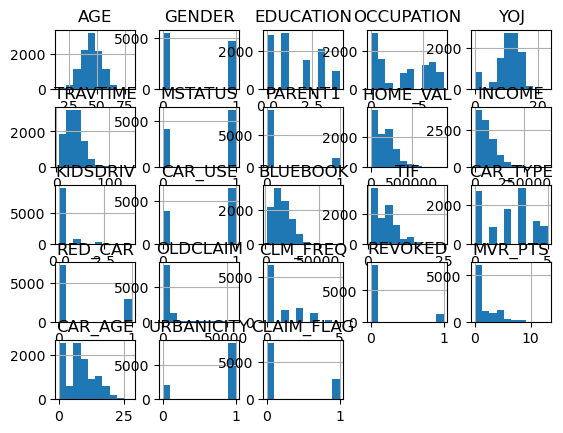

In [110]:
#Encoding the categorical features
encoder = LabelEncoder()

categorical_features = df2.select_dtypes(include=['object']).columns

for col in categorical_features:
    df2[col] = encoder.fit_transform(df2[col])
    
df2[categorical_features] = df2[categorical_features].astype('int64')

df2.info()
df2.hist()

In [82]:
# Scaling the numerical features
scaler = StandardScaler()

numeric_features = []

for col in df.columns:
    if(df_1[col].dtype == "float" or df_1[col].dtype == "int64"):
        numeric_features.append(col)

df_1[numeric_features] = scaler.fit_transform(df_1[numeric_features])

## 1.4 Investigate the Correlation and multicollinearity between the features in the dataset 


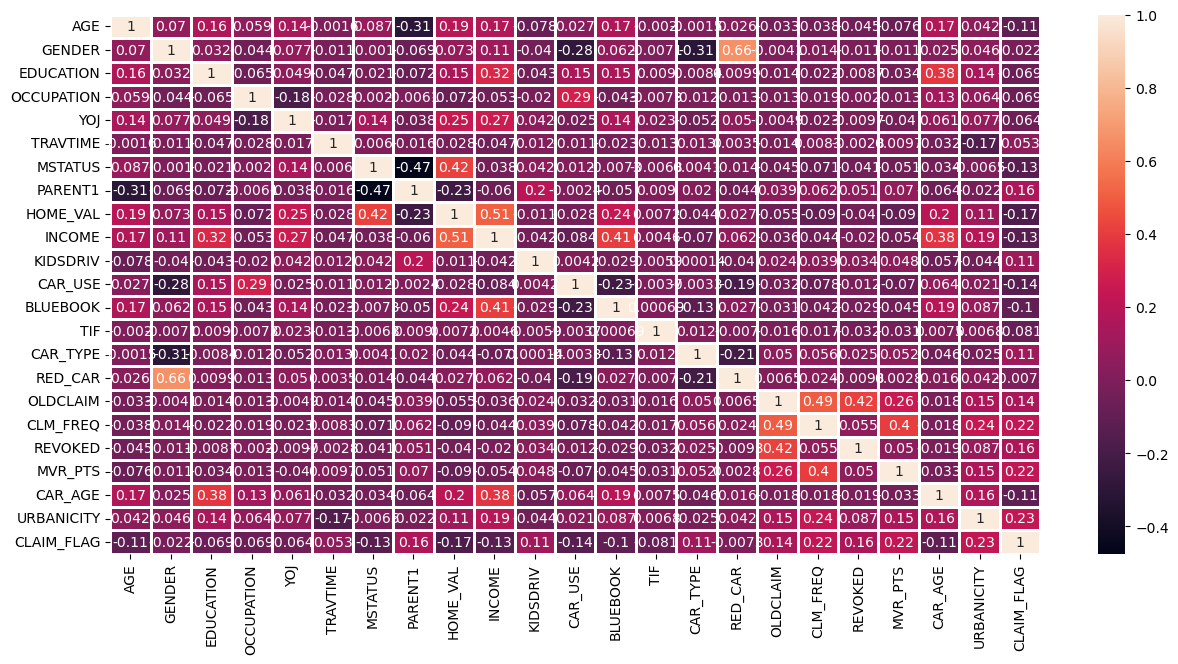

In [111]:
# heatmap

plt.figure(figsize = (15, 7))

corr = df2.corr()

sb.heatmap(data = corr, annot = True, fmt = '.2g', linewidth = 1)
plt.show()

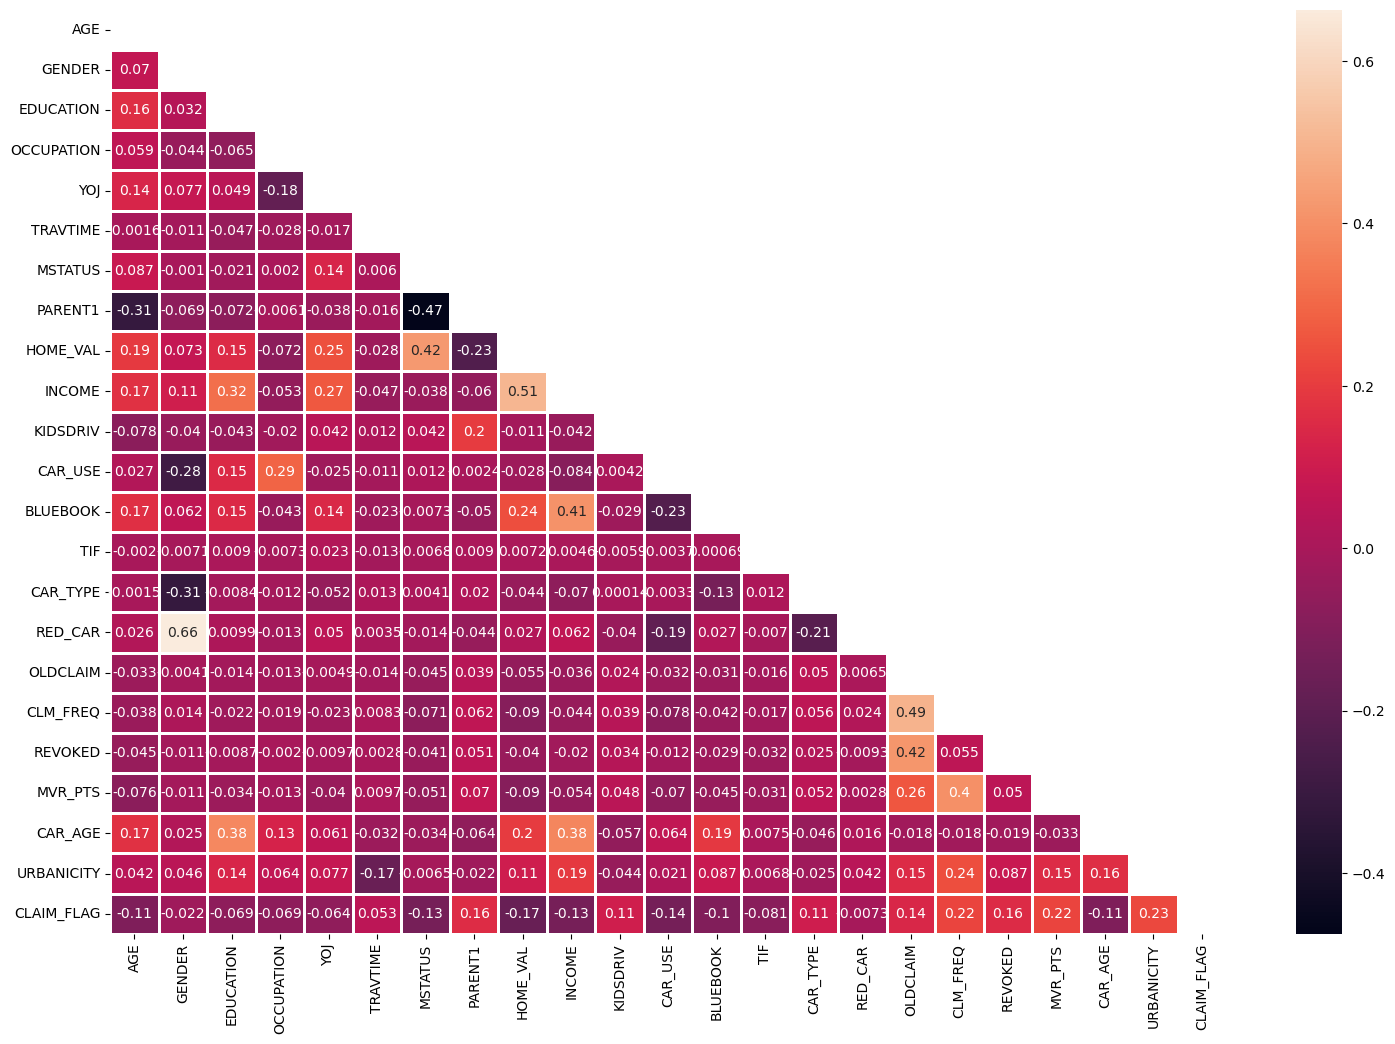

In [112]:
# checking for multicollinearity

plt.figure(figsize = (18, 12))

corr = df2.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sb.heatmap(data = corr, mask = mask, annot = True, fmt = '.2g', linewidth = 1)
plt.show()

## 1.5 visualise the traget variable

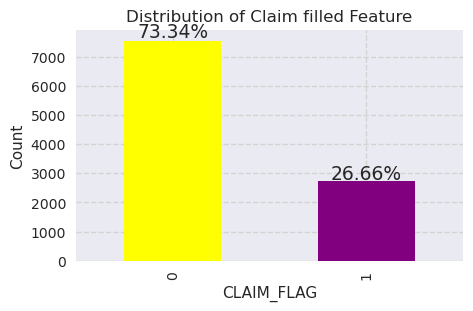

In [113]:
# visualise the traget variable

with plt.style.context('seaborn'):
  plt.figure(figsize=(5,3))
  fig = df2['CLAIM_FLAG'].value_counts().plot(kind='bar', color=['yellow','purple'])
  # Using the "patches" function we will get the location of the rectangle bars from the graph.
  ## Then by using those location(width & height) values we will add the annotations
  for p in fig.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    fig.annotate(f'{str(round((height*100)/df2.shape[0],2))+"%"}', (x + width/2, y + height*1.015), ha='center', fontsize=13.5)
  # Providing the labels and title to the graph
  plt.xlabel("CLAIM_FLAG")
  plt.ylabel("Count")
  plt.grid(which='major', linestyle="--", color='lightgrey')
  plt.minorticks_on()
  plt.title("Distribution of Claim filled Feature")

In [114]:
df2['CLAIM_FLAG'].value_counts()
print(df2['CLAIM_FLAG'].value_counts(), df2['CLAIM_FLAG'].value_counts() / len(df2) * 100)

0    7555
1    2746
Name: CLAIM_FLAG, dtype: int64 0    73.342394
1    26.657606
Name: CLAIM_FLAG, dtype: float64


In [120]:
# visualise the other categorical features according to Target variable

#colz = ['EDUCATION', 'OCCUPATION', 'CAR_TYPE', 'URBANICITY']

#for col in colz:
    #ax = sns.countplot(x=df[col], hue=df['CLAIM_FLAG'], data=df)
    #ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
    #plt.show()

X1       Int32
X2       Int32
X6       Int32
X8       Int32
X11    float64
X13      Int32
X15      Int32
X16      Int32
X18      Int32
X19      Int32
X20      Int32
X3       int32
X4       int32
X5       int32
X7       int32
X9       int32
X10      int32
X12      int32
X14      int32
X17      int32
X21      int32
dtype: object

## 1.6 Splitting Data step

# Split data into train and test data

In [407]:
#split the data in X and Y
X2 = df2.drop(columns=['CLAIM_FLAG'])
Y2 = df2['CLAIM_FLAG']

print(X2.shape)
print(Y2.shape)
X2.info()

(10301, 22)
(10301,)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10301 entries, 0 to 10301
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   AGE         10301 non-null  float64
 1   GENDER      10301 non-null  int64  
 2   EDUCATION   10301 non-null  int64  
 3   OCCUPATION  10301 non-null  int64  
 4   YOJ         10301 non-null  float64
 5   TRAVTIME    10301 non-null  int64  
 6   MSTATUS     10301 non-null  int64  
 7   PARENT1     10301 non-null  int64  
 8   HOME_VAL    10301 non-null  int64  
 9   INCOME      10301 non-null  int64  
 10  KIDSDRIV    10301 non-null  int64  
 11  CAR_USE     10301 non-null  int64  
 12  BLUEBOOK    10301 non-null  int64  
 13  TIF         10301 non-null  int64  
 14  CAR_TYPE    10301 non-null  int64  
 15  RED_CAR     10301 non-null  int64  
 16  OLDCLAIM    10301 non-null  int64  
 17  CLM_FREQ    10301 non-null  int64  
 18  REVOKED     10301 non-null  int64  
 19  MVR_

       AGE  GENDER  EDUCATION  OCCUPATION  YOJ  TRAVTIME  MSTATUS  PARENT1  \
0      3.0     4.0        4.0         4.0  2.0       0.0      0.0      0.0   
1      2.0     4.0        1.0         0.0  2.0       0.0      0.0      0.0   
2      2.0     4.0        0.0         3.0  2.0       0.0      0.0      0.0   
3      1.0     0.0        1.0         0.0  2.0       0.0      4.0      0.0   
4      2.0     4.0        2.0         0.0  3.0       0.0      4.0      0.0   
...    ...     ...        ...         ...  ...       ...      ...      ...   
10297  2.0     4.0        4.0         3.0  1.0       0.0      4.0      0.0   
10298  2.0     4.0        3.0         0.0  1.0       1.0      4.0      0.0   
10299  2.0     0.0        2.0         0.0  3.0       0.0      4.0      0.0   
10300  2.0     0.0        0.0         2.0  1.0       1.0      4.0      0.0   
10301  2.0     0.0        1.0         0.0  2.0       2.0      4.0      0.0   

       HOME_VAL  INCOME  ...  BLUEBOOK  TIF  CAR_TYPE  RED_CAR 

array([[<AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'GENDER'}>,
        <AxesSubplot:title={'center':'EDUCATION'}>,
        <AxesSubplot:title={'center':'OCCUPATION'}>,
        <AxesSubplot:title={'center':'YOJ'}>],
       [<AxesSubplot:title={'center':'TRAVTIME'}>,
        <AxesSubplot:title={'center':'MSTATUS'}>,
        <AxesSubplot:title={'center':'PARENT1'}>,
        <AxesSubplot:title={'center':'HOME_VAL'}>,
        <AxesSubplot:title={'center':'INCOME'}>],
       [<AxesSubplot:title={'center':'KIDSDRIV'}>,
        <AxesSubplot:title={'center':'CAR_USE'}>,
        <AxesSubplot:title={'center':'BLUEBOOK'}>,
        <AxesSubplot:title={'center':'TIF'}>,
        <AxesSubplot:title={'center':'CAR_TYPE'}>],
       [<AxesSubplot:title={'center':'RED_CAR'}>,
        <AxesSubplot:title={'center':'OLDCLAIM'}>,
        <AxesSubplot:title={'center':'CLM_FREQ'}>,
        <AxesSubplot:title={'center':'REVOKED'}>,
        <AxesSubplot:title={'center':'MVR_PTS'}>]

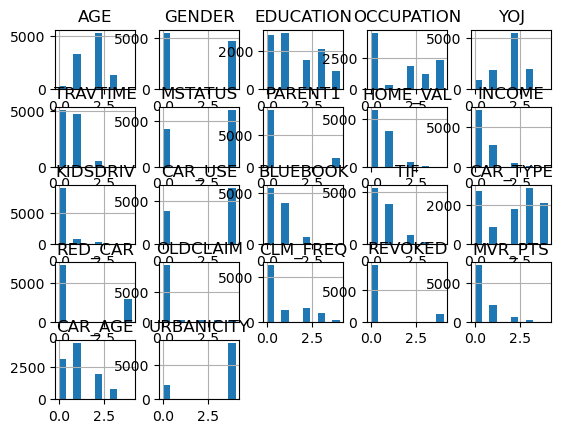

In [408]:
#Discretization The data using  KBinsDiscretizer 
X2 = X2.astype('float32')

KBins = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')

numeric_features = []

for col in X2.columns:
    if(X2[col].dtype == "float32" or X2[col].dtype == "int64"):
        numeric_features.append(col)

X2[numeric_features] = KBins.fit_transform(X2[numeric_features])
    
print (X2[numeric_features])
X2.hist()

# Feature selection method

## 1. Univariate Feature Selection (SelectKBest with ANOVA F-value)

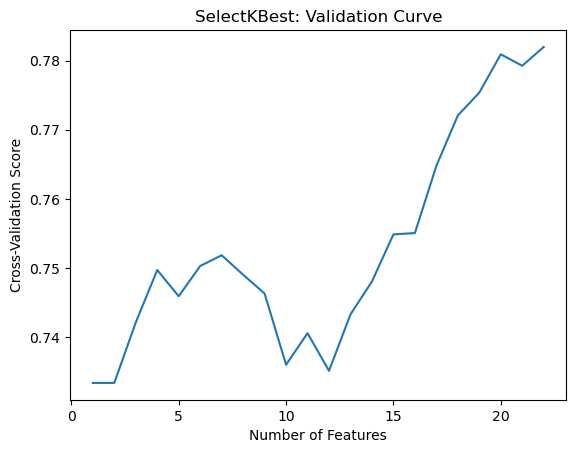

In [372]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation with different number of features
num_features_range = range(1, X2.shape[1] + 1)
cv_scores = []
for k in num_features_range:
    k_best_selector = SelectKBest(score_func=f_classif, k=k)
    X2_kbest = k_best_selector.fit_transform(X2, Y2)
    scores = cross_val_score(RandomForestClassifier(), X2_kbest, Y2, cv=5)
    cv_scores.append(scores.mean())

# Plot validation curve
plt.plot(num_features_range, cv_scores)
plt.xlabel('Number of Features')
plt.ylabel('Cross-Validation Score')
plt.title('SelectKBest: Validation Curve')
plt.show()

Selected features using SelectKBest:  [ 0  2  3  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21]


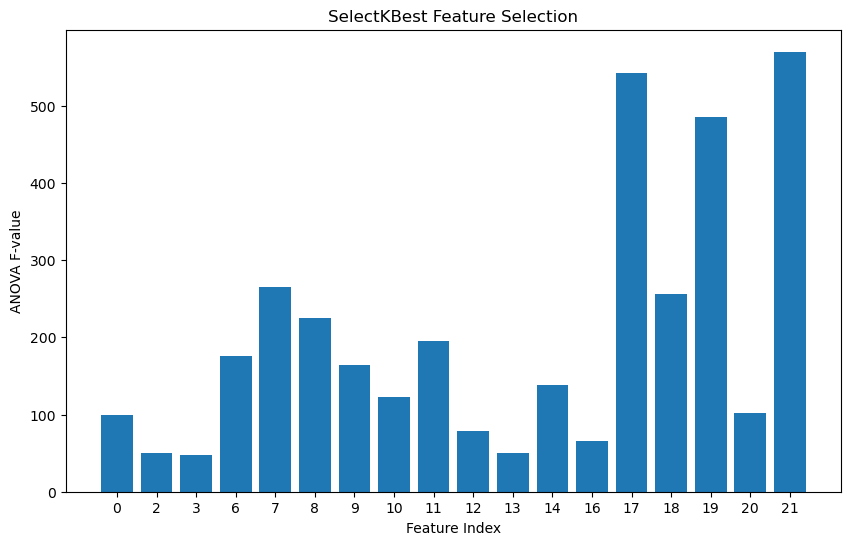

In [437]:
k_best_selector = SelectKBest(score_func=f_classif, k=18)
X2_kbest = k_best_selector.fit_transform(X2, Y2)
selected_features_kbest = np.where(k_best_selector.get_support())[0]

print("Selected features using SelectKBest: ", selected_features_kbest)

# Plotting SelectKBest results
plt.figure(figsize=(10, 6))
plt.bar(range(len(selected_features_kbest)), k_best_selector.scores_[k_best_selector.get_support()])
plt.xticks(range(len(selected_features_kbest)), selected_features_kbest)
plt.xlabel('Feature Index')
plt.ylabel('ANOVA F-value')
plt.title('SelectKBest Feature Selection')
plt.show()

## 2 Recursive Feature Elimination (RFE) 

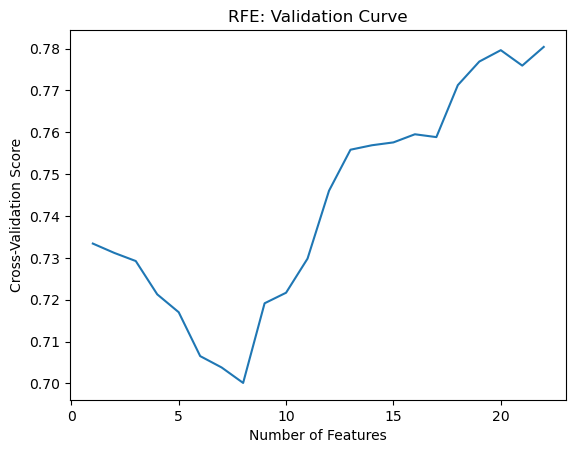

In [389]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation with different number of features
num_features_range = range(1, X2.shape[1] + 1)
cv_scores = []
for k in num_features_range:
    rf_classifier = RandomForestClassifier()
    rfe_selector = RFE(estimator=rf_classifier, n_features_to_select=k, step=1)
    X2_rfe = rfe_selector.fit_transform(X2, Y2)
    scores = cross_val_score(rf_classifier, X2_rfe, Y2, cv=5)
    cv_scores.append(scores.mean())

# Plot validation curve
plt.plot(num_features_range, cv_scores)
plt.xlabel('Number of Features')
plt.ylabel('Cross-Validation Score')
plt.title('RFE: Validation Curve')
plt.show()

In [423]:
rf_classifier = RandomForestClassifier()
rfe_selector = RFE(estimator=rf_classifier, n_features_to_select=17, step=1)
X2_RFE = rfe_selector.fit_transform(X2, Y2)
selected_features_rfe = np.where(rfe_selector.support_)[0]

# Print selected features
print("Selected features using RFE: ", selected_features_rfe)


# Plotting RFE results
plt.figure(figsize=(10, 6))
selected_feature_importances = rfe_selector.estimator_.feature_importances_[rfe_selector.support_]
plt.bar(range(len(selected_feature_importances)), selected_feature_importances)
plt.xticks(range(len(selected_features_rfe)), selected_features_rfe)
plt.xlabel('Feature Index')
plt.ylabel('Feature Importance')
plt.title('RFE Feature Selection')
plt.show()

Selected features using RFE:  [ 0  2  3  4  5  6  8  9 10 12 13 14 15 17 19 20 21]


IndexError: boolean index did not match indexed array along dimension 0; dimension is 17 but corresponding boolean dimension is 22

<Figure size 1000x600 with 0 Axes>

In [452]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split (X_new, Y_new, test_size=0.20, random_state=52)

print (X2_train.shape)
print (Y2_train.shape)
print (X2_test.shape)
print (Y2_test.shape)

(12088, 17)
(12088, 1)
(3022, 17)
(3022, 1)


In [451]:
smotesample = SMOTE(random_state=52)

# Smotesampling
X_b, Y_b= smotesample.fit_resample(X2_RFE, Y2)

X_new = pd.DataFrame(X_b)
Y_new = pd.DataFrame(Y_b)

New_data = pd.concat([X_new, Y_new], axis=0)

# Resampling Methods

## 1. Undersampler

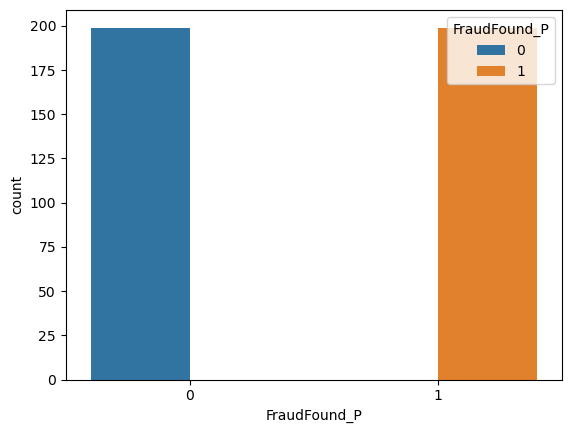

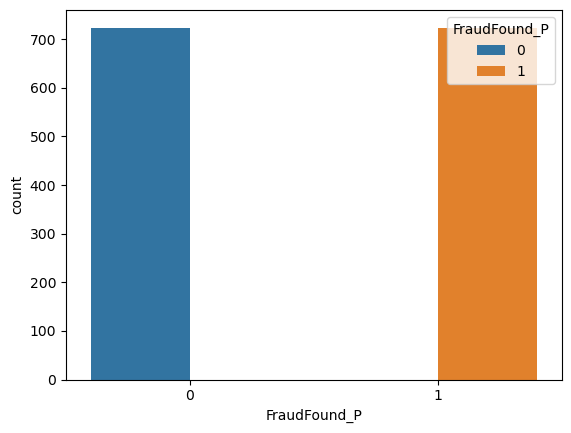

0    11611
1      724
Name: FraudFound_P, dtype: int64
0    2885
1     199
Name: FraudFound_P, dtype: int64


In [44]:
undersample = RandomUnderSampler(sampling_strategy='majority', random_state=52)

# undersampling
X_b, Y_b = undersample.fit_resample(X2, Y2)

X_new = pd.DataFrame(X_b)
Y_new = pd.DataFrame(Y_b)

New_data = pd.concat([X_new, Y_new], axis=0)

## 2. Oversampler

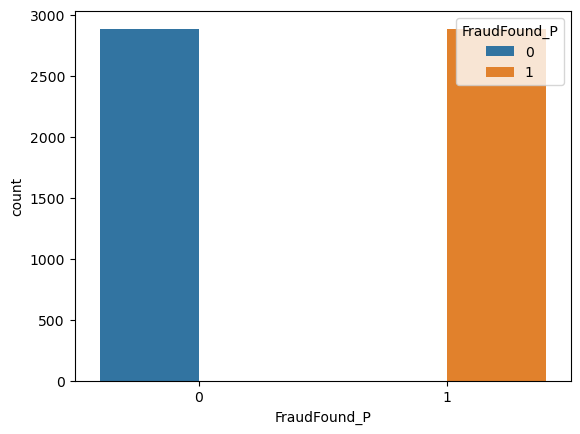

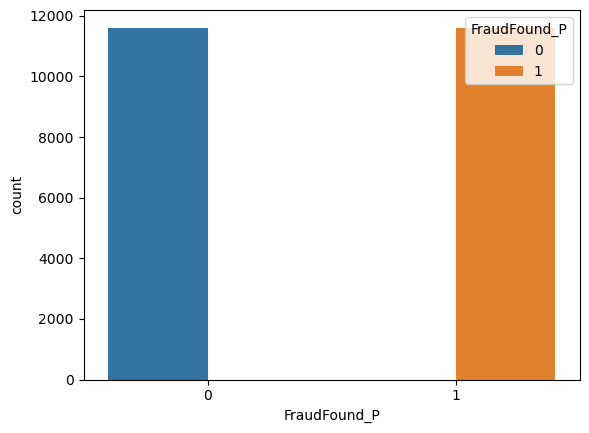

0    11611
1      724
Name: FraudFound_P, dtype: int64
0    2885
1     199
Name: FraudFound_P, dtype: int64


In [48]:
Oversample = RandomOverSampler(random_state=52)

# oversampling
X_b, Y_b = Oversample.fit_resample(X2, Y2)

X_new = pd.DataFrame(X_b)
Y_new = pd.DataFrame(Y_b)

New_data = pd.concat([X_new, Y_new], axis=0)

## 3. SMOTE sampler

In [117]:
smotesample = SMOTE(random_state=52)

# Smotesampling
X_b, Y_b= smotesample.fit_resample(X2, Y2)

X_new = pd.DataFrame(X_b)
Y_new = pd.DataFrame(Y_b)

New_data = pd.concat([X_new, Y_new], axis=0)

Month  WeekOfMonth  DayOfWeek  The vehicle Brand  AccidentArea  \
0        2.0          5.0        6.0                6.0           1.0   
1        4.0          3.0        6.0                6.0           1.0   
2       10.0          5.0        0.0                6.0           1.0   
3        6.0          2.0        2.0               17.0           0.0   
4        4.0          5.0        1.0                6.0           1.0   
...      ...          ...        ...                ...           ...   
28987    NaN          NaN        NaN                NaN           NaN   
28988    NaN          NaN        NaN                NaN           NaN   
28989    NaN          NaN        NaN                NaN           NaN   
28990    NaN          NaN        NaN                NaN           NaN   
28991    NaN          NaN        NaN                NaN           NaN   

       DayOfWeekClaimed  MonthClaimed  WeekOfMonthClaimed  Sex  MaritalStatus  \
0                   5.0           4.0                 1.0  0.0            2.0   
1                   1.0           4.0                 4.0  1.0            2.0   
2                   4.0           9.0                 2.0  1.0            1.0   
3                   0.0           5.0                 1.0  1.0            1.0   
4                   5.0           3.0                 2.0  0.0            2.0   
...                 ...           ...                 ...  ...            ...   
28987               NaN           NaN                 NaN  NaN            NaN   
28988               NaN           NaN                 NaN  NaN            NaN   
28989               NaN           NaN                 NaN  NaN            NaN   
28990               NaN           NaN                 NaN  NaN            NaN   
28991               NaN           NaN                 NaN  NaN            NaN   

       ...  AgeOfVehicle  AgeOfPolicyHolder  PoliceReportFiled  \
0      ...           1.0                3.0                0.0   
1      ...           4.0                4.0                1.0   
2      ...           5.0                6.0                0.0   
3      ...           6.0                7.0                1.0   
4      ...           3.0                4.0                0.0   
...    ...           ...                ...                ...   
28987  ...           NaN                NaN                NaN   
28988  ...           NaN                NaN                NaN   
28989  ...           NaN                NaN                NaN   
28990  ...           NaN                NaN                NaN   
28991  ...           NaN                NaN                NaN   

       WitnessPresent  AgentType  AddressChange_Claim  NumberOfCars    Year  \
0                 0.0        0.0                  0.0           2.0  1994.0   
1                 0.0        0.0                  3.0           0.0  1994.0   
2                 0.0        0.0                  3.0           0.0  1994.0   
3                 0.0        0.0                  3.0           0.0  1994.0   
4                 0.0        0.0                  3.0           0.0  1994.0   
...               ...        ...                  ...           ...     ...   
28987             NaN        NaN                  NaN           NaN     NaN   
28988             NaN        NaN                  NaN           NaN     NaN   
28989             NaN        NaN                  NaN           NaN     NaN   
28990             NaN        NaN                  NaN           NaN     NaN   
28991             NaN        NaN                  NaN           NaN     NaN   

       BasePolicy  FraudFound_P  
0             2.0           NaN  
1             1.0           NaN  
2             1.0           NaN  
3             2.0           NaN  
4             1.0           NaN  
...           ...           ...  
28987         NaN           1.0  
28988         NaN           1.0  
28989         NaN           1.0  
28990         NaN           1.0  
28991         NaN           1.0  

[57984

# Creat the Classifiers First Scenario

## 1. Decision Tree Classifier

C:\Users\Eyadُُ\AppData\Local\Temp\ipykernel_11680\512980937.py:14: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "append" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('CM1_DT_S15SMOTEsampler_plots.pdf', bbox_inches='tight', format='pdf', transparent=True, append=True)
C:\Users\Eyadُُ\AppData\Local\Temp\ipykernel_11680\512980937.py:20: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "append" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('CM2_DT_S15SMOTEsampler_plots.pdf', bbox_inches='tight', format='pdf', transparent=True, append=True)


Model Evaluation Type  Accuracy  F1 Score  Recall Score  \
0  DT Classifier           Train  0.997766  0.997753      0.995681   
1  DT Classifier            Test  0.780609  0.786198      0.794137   

   Precision Score  ROC AUC Score  
0         0.999833       0.997758  
1         0.778416       0.780391

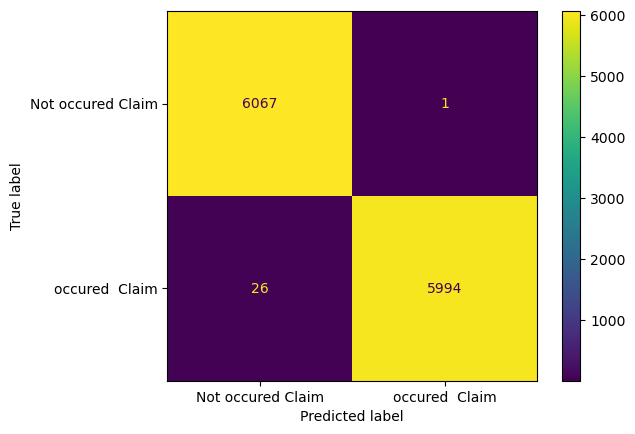

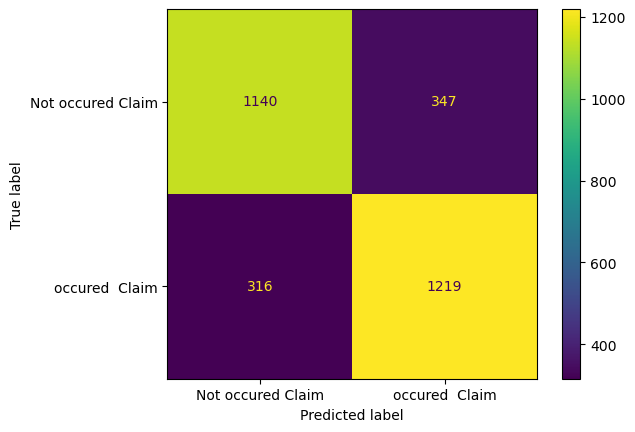

In [453]:
DT_model= DecisionTreeClassifier(random_state=52)
DT_model_df= DT_model.fit(X2_train, Y2_train)

# prediction with baseline

DT_predictions_train = DT_model_df.predict(X2_train)
DT_predictions = DT_model_df.predict(X2_test)

# the confusion Mat for training and testing

confusion_mat = metrics.confusion_matrix(Y2_train, DT_predictions_train)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=["Not occured Claim", "occured  Claim"])
disp.plot()
plt.savefig('CM1_DT_S15SMOTEsampler_plots.pdf', bbox_inches='tight', format='pdf', transparent=True, append=True)
#plt.close()

confusion_mat = metrics.confusion_matrix(Y2_test,DT_predictions)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_mat,display_labels=["Not occured Claim", "occured  Claim"])
disp.plot()
plt.savefig('CM2_DT_S15SMOTEsampler_plots.pdf', bbox_inches='tight', format='pdf', transparent=True, append=True)
#plt.close()

model_name = 'DT Classifier'

#Train Evaluation baseline
Accuracy_Train= metrics.accuracy_score(Y2_train, DT_predictions_train)
f1_score_Train= metrics.f1_score(Y2_train, DT_predictions_train)
recall_score_Train= metrics.recall_score(Y2_train, DT_predictions_train)
precision_score_Train= metrics.precision_score(Y2_train, DT_predictions_train)
roc_auc_score_Train= metrics.roc_auc_score(Y2_train, DT_predictions_train)

#Test Evaluation 
tn, fp, fn, tp = metrics.confusion_matrix(Y2_test, DT_predictions).ravel()
Accuracy_Test= metrics.accuracy_score(Y2_test, DT_predictions)
f1_score_Test= metrics.f1_score(Y2_test, DT_predictions)
recall_score_Test= metrics.recall_score(Y2_test, DT_predictions)
precision_score_Test= metrics.precision_score(Y2_test, DT_predictions)
roc_auc_score_Test= metrics.roc_auc_score(Y2_test, DT_predictions)


# Organize the data into lists
evaluation_type = ['Train', 'Test']
accuracy = [Accuracy_Train, Accuracy_Test]
f1_score = [f1_score_Train, f1_score_Test]
recall_score = [recall_score_Train, recall_score_Test]
precision_score = [precision_score_Train, precision_score_Test]
roc_auc_score = [roc_auc_score_Train, roc_auc_score_Test]

# Create a DataFrame
DT_evaluation = pd.DataFrame({
    'Model': [model_name, model_name],
    'Evaluation Type': evaluation_type,
    'Accuracy': accuracy,
    'F1 Score': f1_score,
    'Recall Score': recall_score,
    'Precision Score': precision_score,
    'ROC AUC Score': roc_auc_score
})

# Print the DataFrame
DT= pd.DataFrame(DT_evaluation)
DT

0.9977581320888185
0.7803905289928568


C:\Users\Eyadُُ\AppData\Local\Temp\ipykernel_11680\3627282911.py:29: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "append" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('ROC_DT_S15SMOTEsampler_plots.pdf', bbox_inches='tight', format='pdf', transparent=True, append=True)


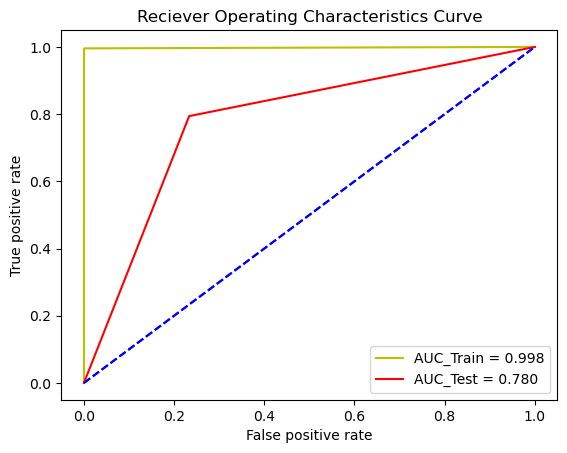

In [454]:
# plotting the ROC curve for training
frp_train,trp_train, threshold = roc_curve(Y2_train,DT_predictions_train)
roc_auc_train = auc(frp_train,trp_train)
plt.title('Reciever Operating Characteristics Curve')
plt.plot(frp_train,trp_train,'y',label = 'AUC_Train = %0.3f' % roc_auc_train)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'b--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')

area_under_roc_curve_train = metrics.auc(frp_train,trp_train)
print (area_under_roc_curve_train)


# plotting the ROC curve for testing
frp_test,trp_test, threshold = roc_curve(Y2_test,DT_predictions)

roc_auc_test = auc(frp_test,trp_test)
plt.title('Reciever Operating Characteristics Curve')
plt.plot(frp_test,trp_test,'r',label = 'AUC_Test = %0.3f' % roc_auc_test)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'b--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')

area_under_roc_curve_test = metrics.auc(frp_test,trp_test)
print (area_under_roc_curve_test)

plt.savefig('ROC_DT_S15SMOTEsampler_plots.pdf', bbox_inches='tight', format='pdf', transparent=True, append=True)

## 2. Random Forest Classifier

C:\Users\Eyadُُ\AppData\Local\Temp\ipykernel_11680\3456711392.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_model_df= RF_model.fit(X2_train, Y2_train)
C:\Users\Eyadُُ\AppData\Local\Temp\ipykernel_11680\3456711392.py:13: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "append" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('CM1_RF_S15SMOTEsampler_plots.pdf', bbox_inches='tight', format='pdf', transparent=True, append=True)
C:\Users\Eyadُُ\AppData\Local\Temp\ipykernel_11680\3456711392.py:20: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "append" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('CM2_RF_S15SMOTEsampler_plots.pdf', bbox_inches='tight', format='pdf', transparent=True, append=True)


Model Evaluation Type  Accuracy  F1 Score  Recall Score  \
0  RF Classifier           Train  0.988915  0.988796      0.982226   
1  RF Classifier            Test  0.831238  0.824138      0.778502   

   Precision Score  ROC AUC Score  
0         0.995455       0.988888  
1         0.875458       0.832089

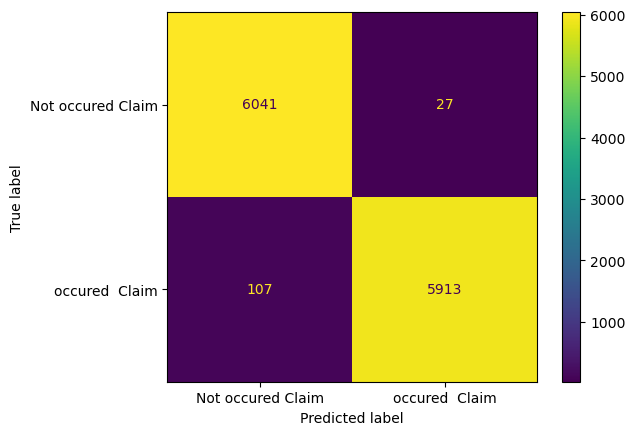

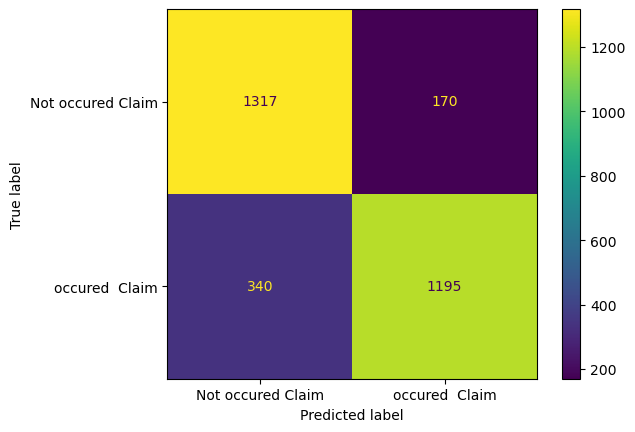

In [455]:
RF_model= RandomForestClassifier(n_estimators=10, random_state=52)

RF_model_df= RF_model.fit(X2_train, Y2_train)

RF_predictions_train = RF_model_df.predict(X2_train)
RF_predictions = RF_model_df.predict(X2_test)

# the confusion Mat for training and testing

confusion_mat = metrics.confusion_matrix(Y2_train, RF_predictions_train)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_mat,display_labels=["Not occured Claim", "occured  Claim"])
disp.plot()
plt.savefig('CM1_RF_S15SMOTEsampler_plots.pdf', bbox_inches='tight', format='pdf', transparent=True, append=True)



confusion_mat = metrics.confusion_matrix(Y2_test,RF_predictions)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_mat,display_labels=["Not occured Claim", "occured  Claim"])
disp.plot()
plt.savefig('CM2_RF_S15SMOTEsampler_plots.pdf', bbox_inches='tight', format='pdf', transparent=True, append=True)



model_name = 'RF Classifier'

#Train Evaluation 
Accuracy_Train= metrics.accuracy_score(Y2_train, RF_predictions_train)
f1_score_Train= metrics.f1_score(Y2_train, RF_predictions_train)
recall_score_Train= metrics.recall_score(Y2_train, RF_predictions_train)
precision_score_Train= metrics.precision_score(Y2_train, RF_predictions_train)
roc_auc_score_Train= metrics.roc_auc_score(Y2_train, RF_predictions_train)

#Test Evaluation 
tn, fp, fn, tp = metrics.confusion_matrix(Y2_test, RF_predictions).ravel()
Accuracy_Test= metrics.accuracy_score(Y2_test, RF_predictions)
f1_score_Test= metrics.f1_score(Y2_test, RF_predictions)
recall_score_Test= metrics.recall_score(Y2_test, RF_predictions)
precision_score_Test= metrics.precision_score(Y2_test, RF_predictions)
roc_auc_score_Test= metrics.roc_auc_score(Y2_test, RF_predictions)


# Organize the data into lists
evaluation_type = ['Train', 'Test']
accuracy = [Accuracy_Train, Accuracy_Test]
f1_score = [f1_score_Train, f1_score_Test]
recall_score = [recall_score_Train, recall_score_Test]
precision_score = [precision_score_Train, precision_score_Test]
roc_auc_score = [roc_auc_score_Train, roc_auc_score_Test]

# Create a DataFrame
RF_evaluation = pd.DataFrame({
    'Model': [model_name, model_name],
    'Evaluation Type': evaluation_type,
    'Accuracy': accuracy,
    'F1 Score': f1_score,
    'Recall Score': recall_score,
    'Precision Score': precision_score,
    'ROC AUC Score': roc_auc_score
})

# Print the DataFrame
RF= pd.DataFrame(RF_evaluation)
RF

0.98888817104926
0.8320887430477821


C:\Users\Eyadُُ\AppData\Local\Temp\ipykernel_11680\3578519598.py:29: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "append" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('ROC_RF_S15SMOTEsampler_plots.pdf', bbox_inches='tight', format='pdf', transparent=True, append=True)


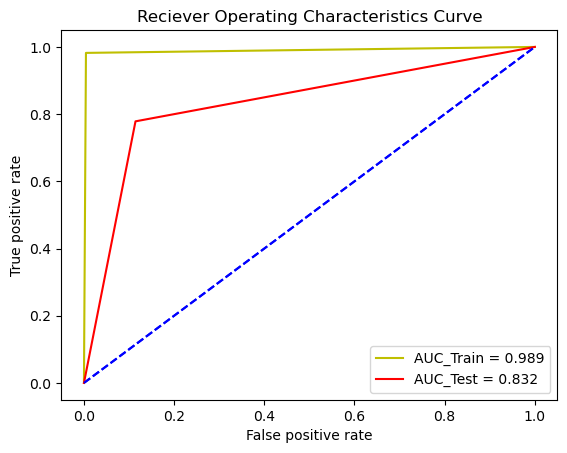

In [456]:
# plotting the ROC curve for training
frp_train,trp_train, threshold = roc_curve(Y2_train,RF_predictions_train)
roc_auc_train = auc(frp_train,trp_train)
plt.title('Reciever Operating Characteristics Curve')
plt.plot(frp_train,trp_train,'y',label = 'AUC_Train = %0.3f' % roc_auc_train)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'b--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')

area_under_roc_curve_train = metrics.auc(frp_train,trp_train)
print (area_under_roc_curve_train)


# plotting the ROC curve for testing
frp_test,trp_test, threshold = roc_curve(Y2_test,RF_predictions)

roc_auc_test = auc(frp_test,trp_test)
plt.title('Reciever Operating Characteristics Curve')
plt.plot(frp_test,trp_test,'r',label = 'AUC_Test = %0.3f' % roc_auc_test)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'b--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')

area_under_roc_curve_test = metrics.auc(frp_test,trp_test)
print (area_under_roc_curve_test)

plt.savefig('ROC_RF_S15SMOTEsampler_plots.pdf', bbox_inches='tight', format='pdf', transparent=True, append=True)

## 3. AdaBoost Classifier

E:\python\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Eyadُُ\AppData\Local\Temp\ipykernel_11680\315321225.py:13: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "append" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('CM1_AdaBoost_S15SMOTEsampler.pdf', bbox_inches='tight', format='pdf', transparent=True, append=True)
C:\Users\Eyadُُ\AppData\Local\Temp\ipykernel_11680\315321225.py:19: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "append" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('CM2_AdaBoost_S15SMOTEsampler.pdf', bbox_inches='tight', format='pdf', transparent=True, append=True)


Model Evaluation Type  Accuracy  F1 Score  Recall Score  \
0  AdaBoost Classifier           Train  0.822386  0.821217      0.819103   
1  AdaBoost Classifier            Test  0.814030  0.814153      0.801954   

   Precision Score  ROC AUC Score  
0         0.823343       0.822373  
1         0.826729       0.814225

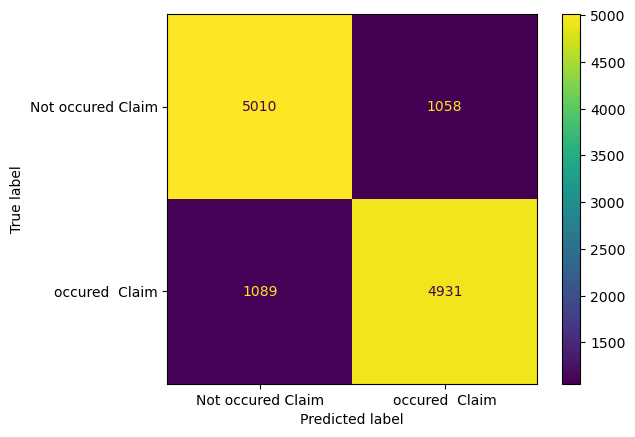

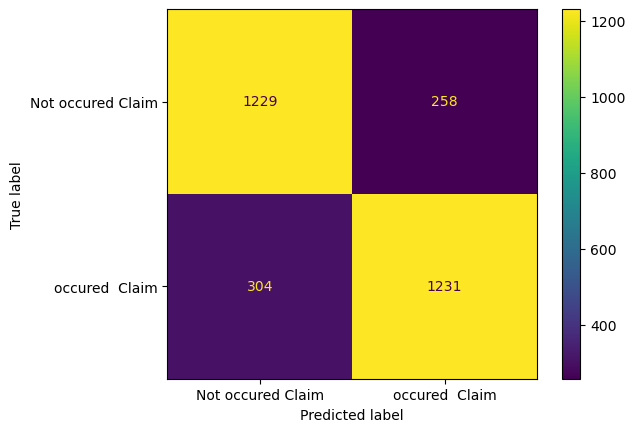

In [457]:
AdaBoost_model = AdaBoostClassifier(random_state=52)

AdaBoost_model_df = AdaBoost_model.fit(X2_train, Y2_train)

AdaBoost_predictions_train = AdaBoost_model_df.predict(X2_train)
AdaBoost_predictions = AdaBoost_model_df.predict(X2_test)

# the confusion Mat for training and testing

confusion_mat = metrics.confusion_matrix(Y2_train, AdaBoost_predictions_train)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_mat,display_labels=["Not occured Claim", "occured  Claim"])
disp.plot()
plt.savefig('CM1_AdaBoost_S15SMOTEsampler.pdf', bbox_inches='tight', format='pdf', transparent=True, append=True)


confusion_mat = metrics.confusion_matrix(Y2_test,AdaBoost_predictions)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_mat,display_labels=["Not occured Claim", "occured  Claim"])
disp.plot()
plt.savefig('CM2_AdaBoost_S15SMOTEsampler.pdf', bbox_inches='tight', format='pdf', transparent=True, append=True)


model_name = 'AdaBoost Classifier'

#Train Evaluation 
Accuracy_Train= metrics.accuracy_score(Y2_train, AdaBoost_predictions_train)
f1_score_Train= metrics.f1_score(Y2_train, AdaBoost_predictions_train)
recall_score_Train= metrics.recall_score(Y2_train, AdaBoost_predictions_train)
precision_score_Train= metrics.precision_score(Y2_train, AdaBoost_predictions_train)
roc_auc_score_Train= metrics.roc_auc_score(Y2_train, AdaBoost_predictions_train)

#Test Evaluation 
tn, fp, fn, tp = metrics.confusion_matrix(Y2_test, AdaBoost_predictions).ravel()
Accuracy_Test= metrics.accuracy_score(Y2_test, AdaBoost_predictions)
f1_score_Test= metrics.f1_score(Y2_test, AdaBoost_predictions)
recall_score_Test= metrics.recall_score(Y2_test, AdaBoost_predictions)
precision_score_Test= metrics.precision_score(Y2_test, AdaBoost_predictions)
roc_auc_score_Test= metrics.roc_auc_score(Y2_test, AdaBoost_predictions)


# Organize the data into lists
evaluation_type = ['Train', 'Test']
accuracy = [Accuracy_Train, Accuracy_Test]
f1_score = [f1_score_Train, f1_score_Test]
recall_score = [recall_score_Train, recall_score_Test]
precision_score = [precision_score_Train, precision_score_Test]
roc_auc_score = [roc_auc_score_Train, roc_auc_score_Test]

# Create a DataFrame
AdaBoost_evaluation = pd.DataFrame({
    'Model': [model_name, model_name],
    'Evaluation Type': evaluation_type,
    'Accuracy': accuracy,
    'F1 Score': f1_score,
    'Recall Score': recall_score,
    'Precision Score': precision_score,
    'ROC AUC Score': roc_auc_score
})

# Print the DataFrame
AdaBoost= pd.DataFrame(AdaBoost_evaluation)
AdaBoost

0.8223728529599205
0.8142253493359386


C:\Users\Eyadُُ\AppData\Local\Temp\ipykernel_11680\1405183729.py:29: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "append" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('ROC_AdaBoost_S15SMOTEsampler_plots.pdf', bbox_inches='tight', format='pdf', transparent=True, append=True)


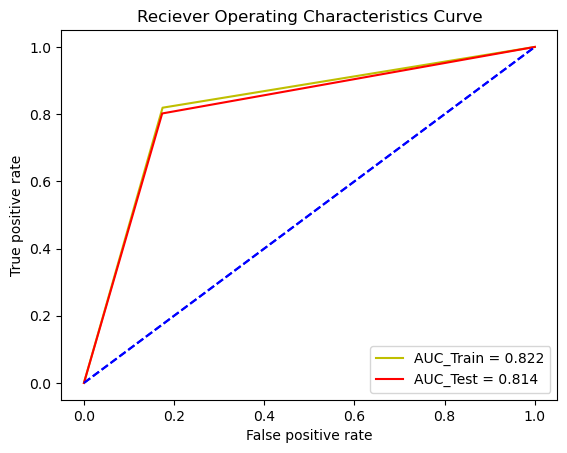

In [458]:
# plotting the ROC curve for training
frp_train,trp_train, threshold = roc_curve(Y2_train,AdaBoost_predictions_train)
roc_auc_train = auc(frp_train,trp_train)
plt.title('Reciever Operating Characteristics Curve')
plt.plot(frp_train,trp_train,'y',label = 'AUC_Train = %0.3f' % roc_auc_train)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'b--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')

area_under_roc_curve_train = metrics.auc(frp_train,trp_train)
print (area_under_roc_curve_train)


# plotting the ROC curve for testing
frp_test,trp_test, threshold = roc_curve(Y2_test,AdaBoost_predictions)

roc_auc_test = auc(frp_test,trp_test)
plt.title('Reciever Operating Characteristics Curve')
plt.plot(frp_test,trp_test,'r',label = 'AUC_Test = %0.3f' % roc_auc_test)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'b--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')

area_under_roc_curve_test = metrics.auc(frp_test,trp_test)
print (area_under_roc_curve_test)

plt.savefig('ROC_AdaBoost_S15SMOTEsampler_plots.pdf', bbox_inches='tight', format='pdf', transparent=True, append=True)

## 4. Gradient Boosting Classifier

E:\python\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Eyadُُ\AppData\Local\Temp\ipykernel_11680\3347818500.py:13: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "append" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('CM1_GB_S15SMOTEsampler_plots.pdf', bbox_inches='tight', format='pdf', transparent=True, append=True)
C:\Users\Eyadُُ\AppData\Local\Temp\ipykernel_11680\3347818500.py:19: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "append" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('CM2_GB_S15SMOTEsampler_plots.pdf', bbox_inches='tight', format='pdf', transparent=True, append=True)


Model Evaluation Type  Accuracy  F1 Score  Recall Score  \
0  GB Classifier           Train  0.847700  0.841743      0.813289   
1  GB Classifier            Test  0.838187  0.834965      0.805863   

   Precision Score  ROC AUC Score  
0         0.872261       0.847564  
1         0.866246       0.838708

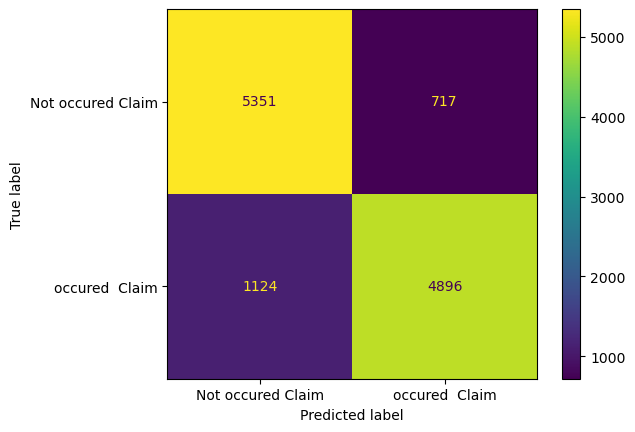

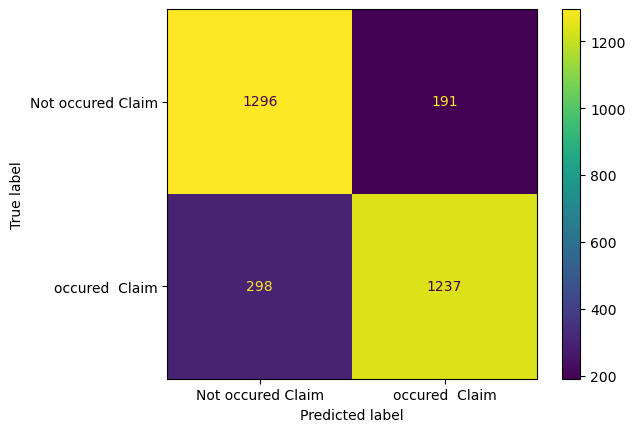

In [459]:
GB_model= GradientBoostingClassifier(random_state=52)
GB_model_df= GB_model.fit(X2_train, Y2_train)

GB_predictions_train = GB_model_df.predict(X2_train)
GB_predictions = GB_model_df.predict(X2_test)


# the confusion Mat for training and testing

confusion_mat = metrics.confusion_matrix(Y2_train, GB_predictions_train)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_mat,display_labels=["Not occured Claim", "occured  Claim"])
disp.plot()
plt.savefig('CM1_GB_S15SMOTEsampler_plots.pdf', bbox_inches='tight', format='pdf', transparent=True, append=True)


confusion_mat = metrics.confusion_matrix(Y2_test,GB_predictions)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_mat,display_labels=["Not occured Claim", "occured  Claim"])
disp.plot()
plt.savefig('CM2_GB_S15SMOTEsampler_plots.pdf', bbox_inches='tight', format='pdf', transparent=True, append=True)



model_name = 'GB Classifier'

#Train Evaluation 
Accuracy_Train= metrics.accuracy_score(Y2_train, GB_predictions_train)
f1_score_Train= metrics.f1_score(Y2_train, GB_predictions_train)
recall_score_Train= metrics.recall_score(Y2_train, GB_predictions_train)
precision_score_Train= metrics.precision_score(Y2_train, GB_predictions_train)
roc_auc_score_Train= metrics.roc_auc_score(Y2_train, GB_predictions_train)

#Test Evaluation 
tn, fp, fn, tp = metrics.confusion_matrix(Y2_test, GB_predictions).ravel()
Accuracy_Test= metrics.accuracy_score(Y2_test, GB_predictions)
f1_score_Test= metrics.f1_score(Y2_test, GB_predictions)
recall_score_Test= metrics.recall_score(Y2_test, GB_predictions)
precision_score_Test= metrics.precision_score(Y2_test, GB_predictions)
roc_auc_score_Test= metrics.roc_auc_score(Y2_test, GB_predictions)

# Organize the data into lists
evaluation_type = ['Train', 'Test']
accuracy = [Accuracy_Train, Accuracy_Test]
f1_score = [f1_score_Train, f1_score_Test]
recall_score = [recall_score_Train, recall_score_Test]
precision_score = [precision_score_Train, precision_score_Test]
roc_auc_score = [roc_auc_score_Train, roc_auc_score_Test]

# Create a DataFrame
GB_evaluation = pd.DataFrame({
    'Model': [model_name, model_name],
    'Evaluation Type': evaluation_type,
    'Accuracy': accuracy,
    'F1 Score': f1_score,
    'Recall Score': recall_score,
    'Precision Score': precision_score,
    'ROC AUC Score': roc_auc_score
})

# Print the DataFrame
GB= pd.DataFrame(GB_evaluation)
GB

0.8475640963871253
0.8387083277657177


C:\Users\Eyadُُ\AppData\Local\Temp\ipykernel_11680\4164613906.py:29: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "append" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('ROC_GB_S15SMOTEsampler_plots.pdf', bbox_inches='tight', format='pdf', transparent=True, append=True)


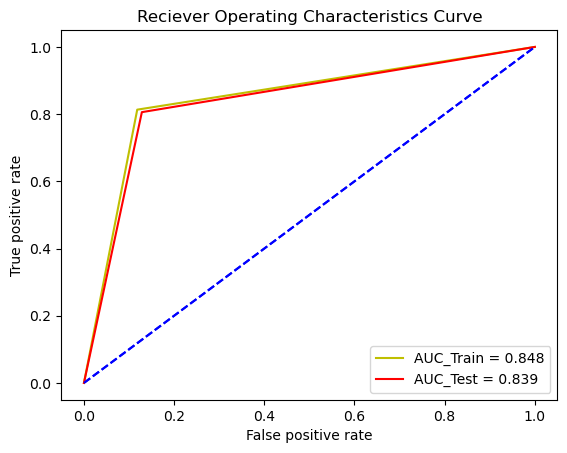

In [460]:
# plotting the ROC curve for training
frp_train,trp_train, threshold = roc_curve(Y2_train,GB_predictions_train)
roc_auc_train = auc(frp_train,trp_train)
plt.title('Reciever Operating Characteristics Curve')
plt.plot(frp_train,trp_train,'y',label = 'AUC_Train = %0.3f' % roc_auc_train)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'b--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')

area_under_roc_curve_train = metrics.auc(frp_train,trp_train)
print (area_under_roc_curve_train)


# plotting the ROC curve for testing
frp_test,trp_test, threshold = roc_curve(Y2_test,GB_predictions)

roc_auc_test = auc(frp_test,trp_test)
plt.title('Reciever Operating Characteristics Curve')
plt.plot(frp_test,trp_test,'r',label = 'AUC_Test = %0.3f' % roc_auc_test)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'b--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')

area_under_roc_curve_test = metrics.auc(frp_test,trp_test)
print (area_under_roc_curve_test)

plt.savefig('ROC_GB_S15SMOTEsampler_plots.pdf', bbox_inches='tight', format='pdf', transparent=True, append=True)

## 5. Bagging Classifier

E:\python\lib\site-packages\sklearn\ensemble\_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Eyadُُ\AppData\Local\Temp\ipykernel_11680\3175774602.py:13: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "append" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('CM1_Bagging_S15SMOTEsampler_plots.pdf', bbox_inches='tight', format='pdf', transparent=True, append=True)
C:\Users\Eyadُُ\AppData\Local\Temp\ipykernel_11680\3175774602.py:19: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "append" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('CM2_Bagging_S15SMOTEsampler_plots.pdf', bbox_inches='tight', format='pdf', transparent=True, append=True)


Model Evaluation Type  Accuracy  F1 Score  Recall Score  \
0  Bagging Classifier           Train  0.988087  0.987946      0.980233   
1  Bagging Classifier            Test  0.829914  0.824573      0.786971   

   Precision Score  ROC AUC Score  
0         0.995781       0.988056  
1         0.865950       0.830607

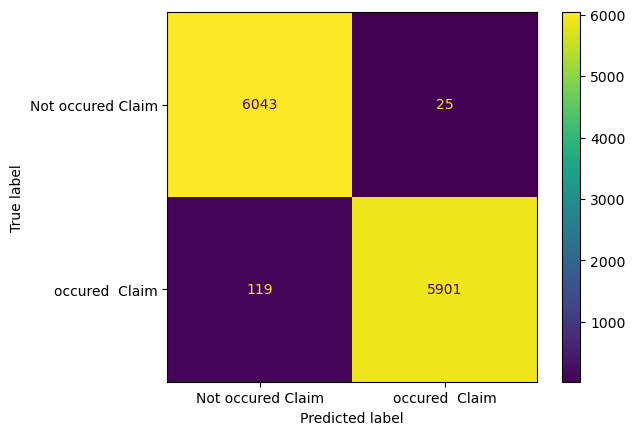

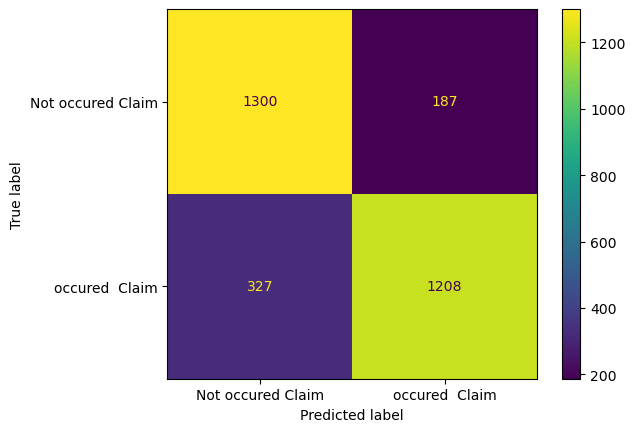

In [461]:
Bagging_model= BaggingClassifier(DecisionTreeClassifier(random_state=52))
Bagging_model_df= Bagging_model.fit(X2_train, Y2_train)

Bagging_predictions_train = Bagging_model_df.predict(X2_train)
Bagging_predictions = Bagging_model_df.predict(X2_test)


# the confusion Mat for training and testing

confusion_mat = metrics.confusion_matrix(Y2_train, Bagging_predictions_train)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_mat,display_labels=["Not occured Claim", "occured  Claim"])
disp.plot()
plt.savefig('CM1_Bagging_S15SMOTEsampler_plots.pdf', bbox_inches='tight', format='pdf', transparent=True, append=True)


confusion_mat = metrics.confusion_matrix(Y2_test,Bagging_predictions)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_mat,display_labels=["Not occured Claim", "occured  Claim"])
disp.plot()
plt.savefig('CM2_Bagging_S15SMOTEsampler_plots.pdf', bbox_inches='tight', format='pdf', transparent=True, append=True)



model_name = 'Bagging Classifier'

#Train Evaluation 
Accuracy_Train= metrics.accuracy_score(Y2_train, Bagging_predictions_train)
f1_score_Train= metrics.f1_score(Y2_train, Bagging_predictions_train)
recall_score_Train= metrics.recall_score(Y2_train, Bagging_predictions_train)
precision_score_Train= metrics.precision_score(Y2_train, Bagging_predictions_train)
roc_auc_score_Train= metrics.roc_auc_score(Y2_train, Bagging_predictions_train)

#Test Evaluation 
tn, fp, fn, tp = metrics.confusion_matrix(Y2_test, Bagging_predictions).ravel()
Accuracy_Test= metrics.accuracy_score(Y2_test, Bagging_predictions)
f1_score_Test= metrics.f1_score(Y2_test, Bagging_predictions)
recall_score_Test= metrics.recall_score(Y2_test, Bagging_predictions)
precision_score_Test= metrics.precision_score(Y2_test, Bagging_predictions)
roc_auc_score_Test= metrics.roc_auc_score(Y2_test, Bagging_predictions)

# Organize the data into lists
evaluation_type = ['Train', 'Test']
accuracy = [Accuracy_Train, Accuracy_Test]
f1_score = [f1_score_Train, f1_score_Test]
recall_score = [recall_score_Train, recall_score_Test]
precision_score = [precision_score_Train, precision_score_Test]
roc_auc_score = [roc_auc_score_Train, roc_auc_score_Test]

# Create a DataFrame
Bagging_evaluation = pd.DataFrame({
    'Model': [model_name, model_name],
    'Evaluation Type': evaluation_type,
    'Accuracy': accuracy,
    'F1 Score': f1_score,
    'Recall Score': recall_score,
    'Precision Score': precision_score,
    'ROC AUC Score': roc_auc_score
})

# Print the DataFrame
Bagging= pd.DataFrame(Bagging_evaluation)
Bagging

0.9880562922536831
0.8306070636066321


C:\Users\Eyadُُ\AppData\Local\Temp\ipykernel_11680\96397884.py:29: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "append" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('ROC_Bagging_S15SMOTEsampler_plots.pdf', bbox_inches='tight', format='pdf', transparent=True, append=True)


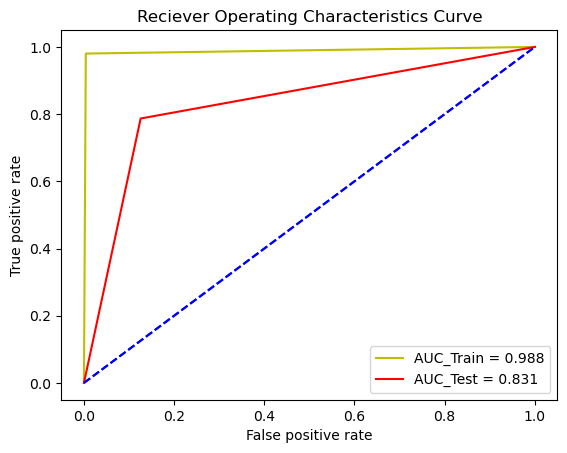

In [462]:
# plotting the ROC curve for training
frp_train,trp_train, threshold = roc_curve(Y2_train,Bagging_predictions_train)
roc_auc_train = auc(frp_train,trp_train)
plt.title('Reciever Operating Characteristics Curve')
plt.plot(frp_train,trp_train,'y',label = 'AUC_Train = %0.3f' % roc_auc_train)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'b--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')

area_under_roc_curve_train = metrics.auc(frp_train,trp_train)
print (area_under_roc_curve_train)


# plotting the ROC curve for testing
frp_test,trp_test, threshold = roc_curve(Y2_test,Bagging_predictions)

roc_auc_test = auc(frp_test,trp_test)
plt.title('Reciever Operating Characteristics Curve')
plt.plot(frp_test,trp_test,'r',label = 'AUC_Test = %0.3f' % roc_auc_test)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'b--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')

area_under_roc_curve_test = metrics.auc(frp_test,trp_test)
print (area_under_roc_curve_test)

plt.savefig('ROC_Bagging_S15SMOTEsampler_plots.pdf', bbox_inches='tight', format='pdf', transparent=True, append=True)

# Comparsion All Models

In [463]:
dfs = [DT, RF, AdaBoost, GB, Bagging] 

# Concatenate the DataFrames vertically
Results_S15SMOTEsampler = pd.concat(dfs, ignore_index=True)

# Define the file path where you want to save the Excel file
file_path = "Results_S15SMOTEsampler.xlsx"

# Save the DataFrame to an Excel file
Results_S15SMOTEsampler.to_excel(file_path, index=False)

# Print the merged DataFrame
pd.DataFrame(Results_S15SMOTEsampler)

Model Evaluation Type  Accuracy  F1 Score  Recall Score  \
0        DT Classifier           Train  0.997766  0.997753      0.995681   
1        DT Classifier            Test  0.780609  0.786198      0.794137   
2        RF Classifier           Train  0.988915  0.988796      0.982226   
3        RF Classifier            Test  0.831238  0.824138      0.778502   
4  AdaBoost Classifier           Train  0.822386  0.821217      0.819103   
5  AdaBoost Classifier            Test  0.814030  0.814153      0.801954   
6        GB Classifier           Train  0.847700  0.841743      0.813289   
7        GB Classifier            Test  0.838187  0.834965      0.805863   
8   Bagging Classifier           Train  0.988087  0.987946      0.980233   
9   Bagging Classifier            Test  0.829914  0.824573      0.786971   

   Precision Score  ROC AUC Score  
0         0.999833       0.997758  
1         0.778416       0.780391  
2         0.995455       0.988888  
3         0.875458       0.832089  
4         0.823343       0.822373  
5         0.826729       0.814225  
6         0.872261       0.847564  
7         0.866246       0.838708  
8         0.995781       0.988056  
9         0.865950       0.830607